
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

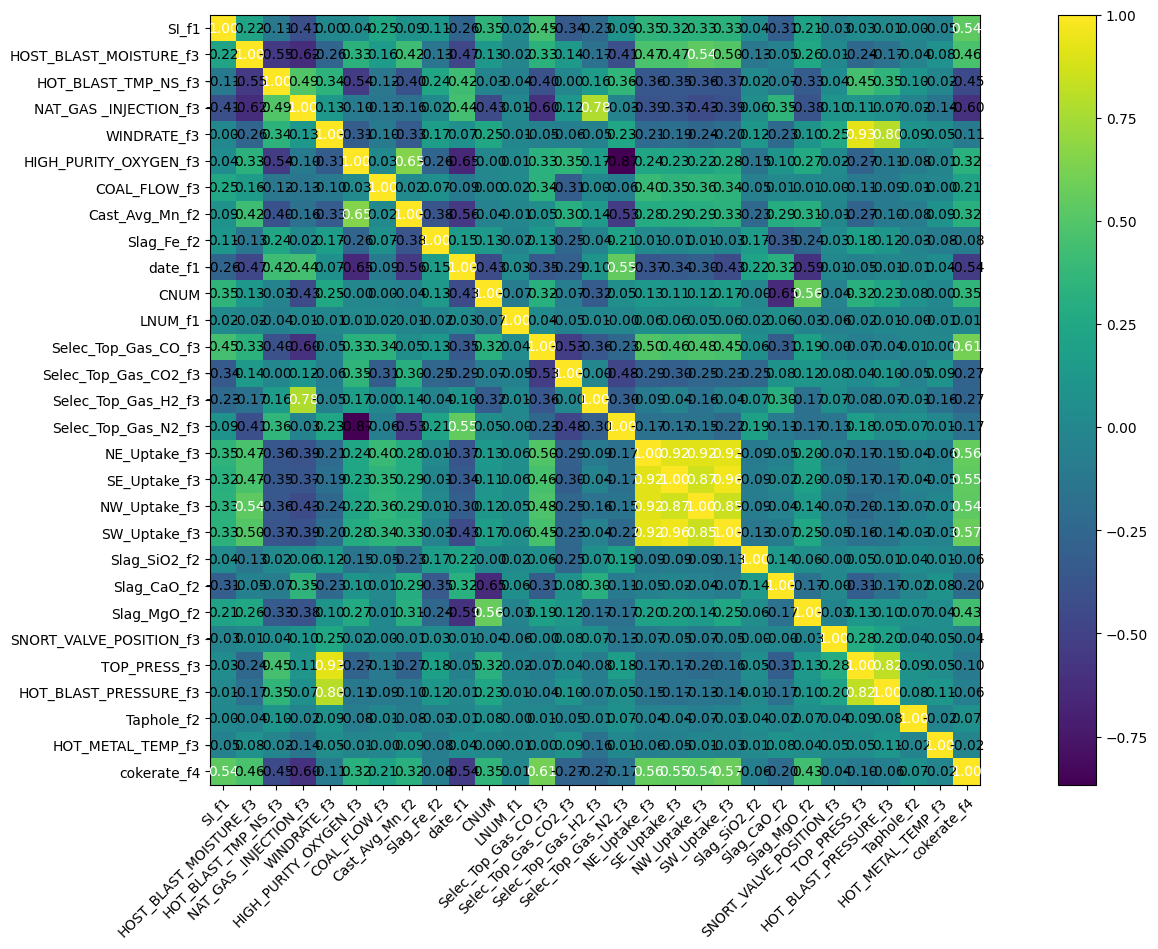

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

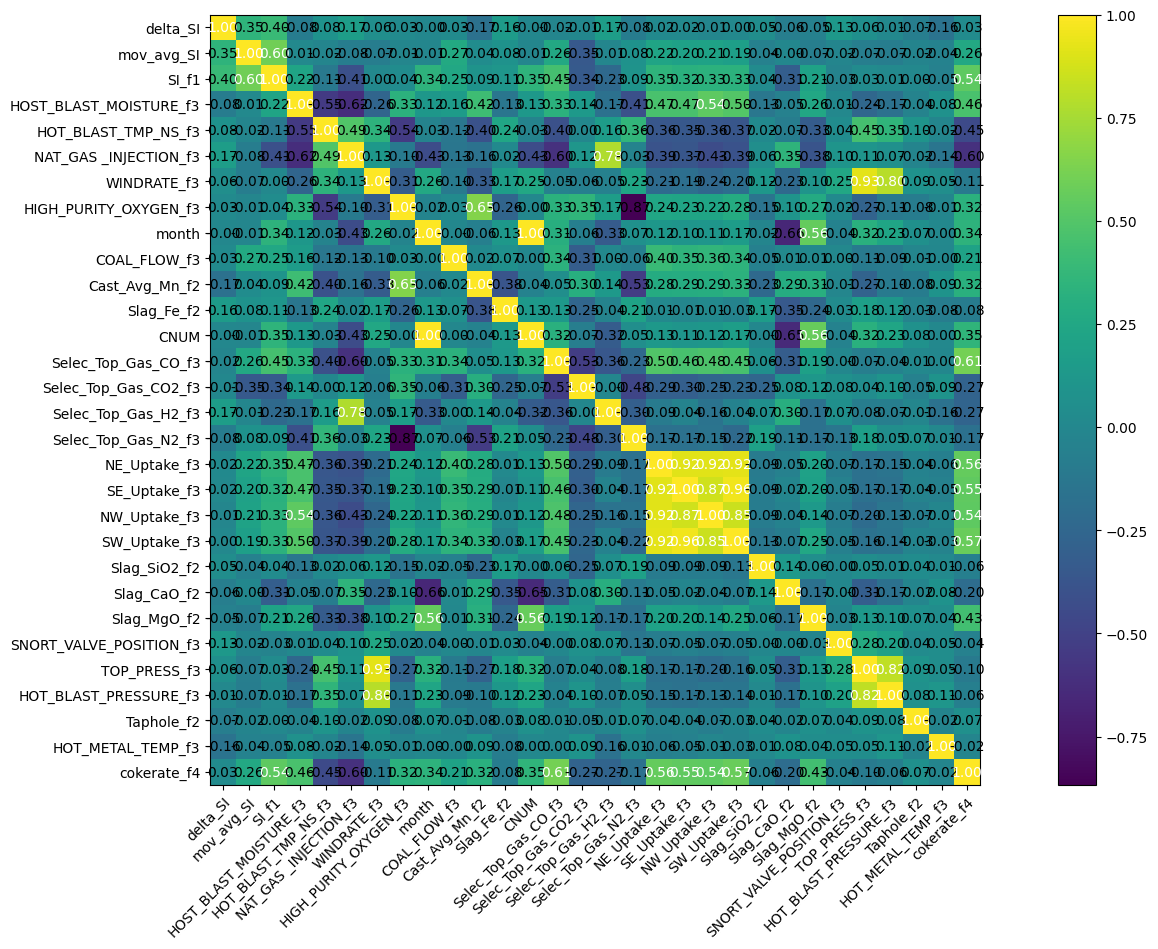

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.457517
Loss_SI: 0.36227351427078247 Loss_all: 1.3147071599960327
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.113243
Loss_SI: 0.052589453756809235 Loss_all: 0.659120500087738
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.072236
Loss_SI: 0.02286224067211151 Loss_all: 0.5166046023368835
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048873
Loss_SI: 0.006814482156187296 Loss_all: 0.42739731073379517
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031396
Loss_SI: 0.0065816910937428474 Loss_all: 0.25472360849380493
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.030938
Loss_SI: 0.005213632248342037 Loss_all: 0.2624562978744507
Prediction shape: torch.Size([32, 35])
===


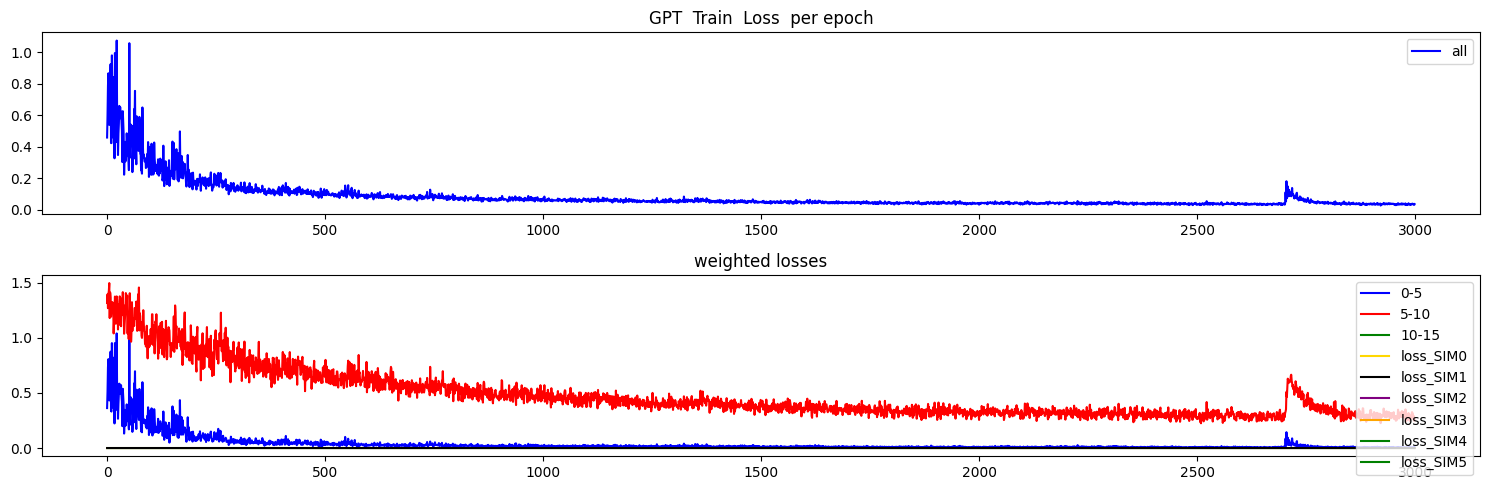

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


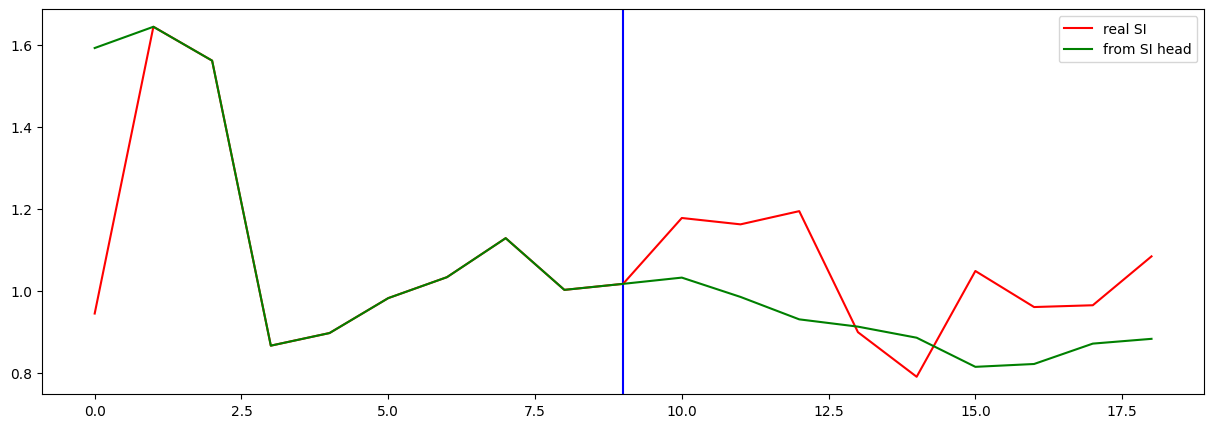

Testing R**2 - (all) - (no inputs):  0.9715100937338657
Testing R**2 - (f2) - SI full (no inputs):  0.03083063702784361
Testing R**2 - SI head only (no inputs):  -0.4560647964848108
0 ...index R**2 (no inputs):  -0.11873177954686032
1 ...index R**2 (no inputs):  -1.8428963384770172
2 ...index R**2 (no inputs):  0.03083063702784361
3 ...index R**2 (no inputs):  -1.392803547031173
4 ...index R**2 (no inputs):  -502.90570757421
5 ...index R**2 (no inputs):  -5.8228487106115665
6 ...index R**2 (no inputs):  -154.700079700596
7 ...index R**2 (no inputs):  -219.24003230742412
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5092509743158831
10 ...index R**2 (no inputs):  0.4021301931019633
11 ...index R**2 (no inputs):  -1.4866546157694294
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2306508581451667
16 ...index R**2 (no inputs):  -0.49270069935838245
17 ...index R**2 (no inputs): 

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.648678
Loss_SI: 0.5689917206764221 Loss_all: 1.3658556938171387
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.168167
Loss_SI: 0.10484938323497772 Loss_all: 0.7380276918411255
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.132936
Loss_SI: 0.052185267210006714 Loss_all: 0.8596883416175842
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.101805
Loss_SI: 0.059809811413288116 Loss_all: 0.4797649085521698
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.060584
Loss_SI: 0.025970574468374252 Loss_all: 0.37210744619369507
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.070925
Loss_SI: 0.034685127437114716 Loss_all: 0.3970875144004822
Prediction shape: torch.Size([32, 35])
===


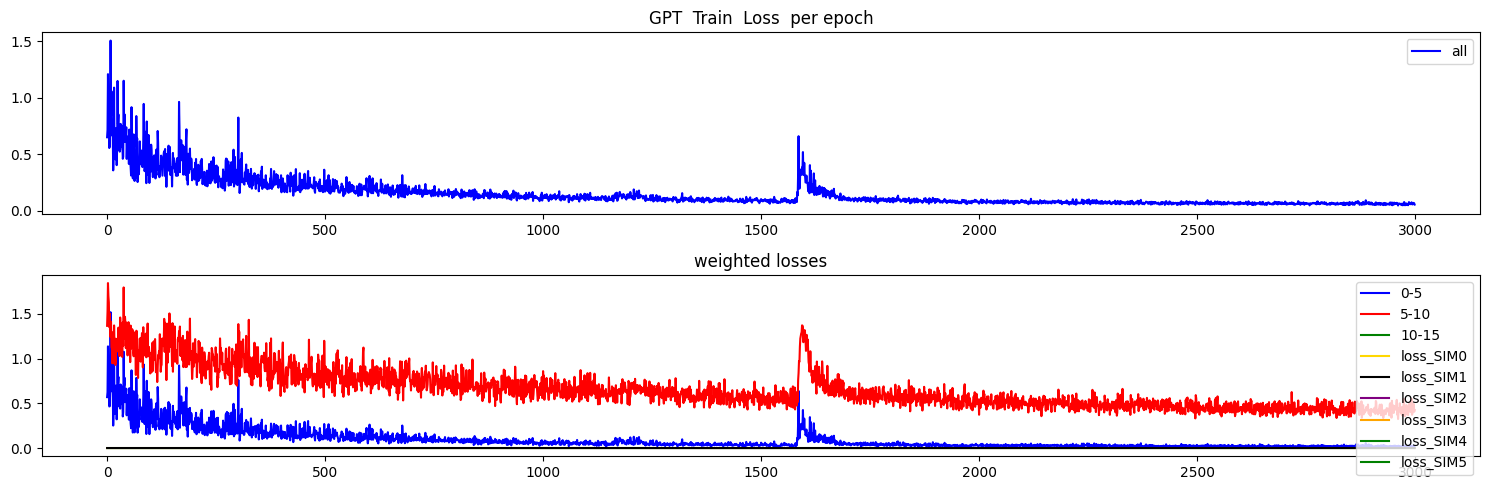

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


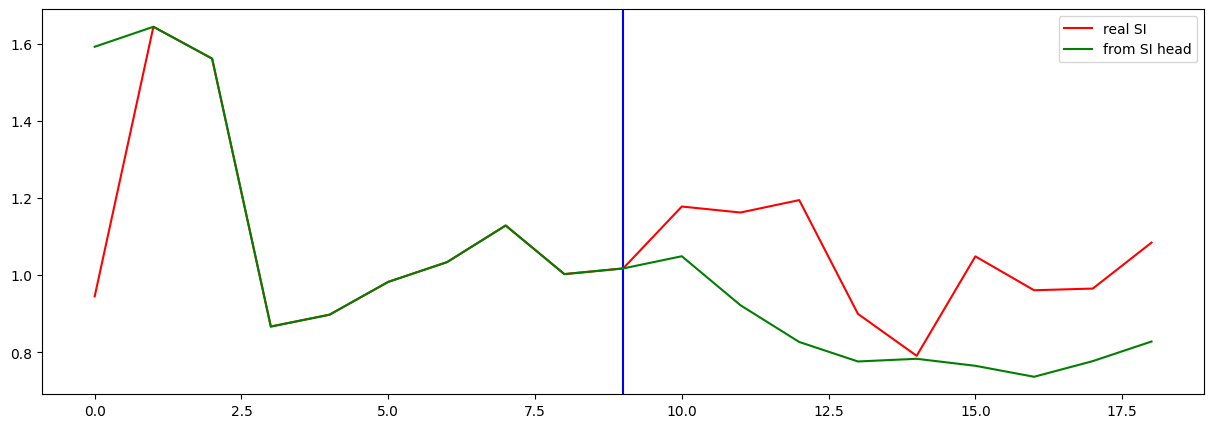

Testing R**2 - (all) - (no inputs):  0.9426793390358753
Testing R**2 - (f2) - SI full (no inputs):  -0.15081887188367094
Testing R**2 - SI head only (no inputs):  -1.7213418149521167
0 ...index R**2 (no inputs):  0.08118861734457727
1 ...index R**2 (no inputs):  -1.717324876738553
2 ...index R**2 (no inputs):  -0.15081887188367094
3 ...index R**2 (no inputs):  -7.954714464521725
4 ...index R**2 (no inputs):  -432.1679515058592
5 ...index R**2 (no inputs):  -12.85106289616367
6 ...index R**2 (no inputs):  -322.06633317658145
7 ...index R**2 (no inputs):  -493.52292419348043
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9920904756566105
10 ...index R**2 (no inputs):  0.09497864714868665
11 ...index R**2 (no inputs):  -387.33350092669576
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4154683405619466
16 ...index R**2 (no inputs):  -0.07155157432712089
17 ...index R**2 (no input

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.341627
Loss_SI: 0.2712099850177765 Loss_all: 0.975380003452301
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.283163
Loss_SI: 0.2053939551115036 Loss_all: 0.9830874800682068
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.130380
Loss_SI: 0.09094008058309555 Loss_all: 0.4853343665599823
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.089741
Loss_SI: 0.03223273158073425 Loss_all: 0.6073160767555237
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.093485
Loss_SI: 0.03659594804048538 Loss_all: 0.6054854393005371
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.079143
Loss_SI: 0.03397918492555618 Loss_all: 0.48562055826187134
Prediction shape: torch.Size([32, 35])
===


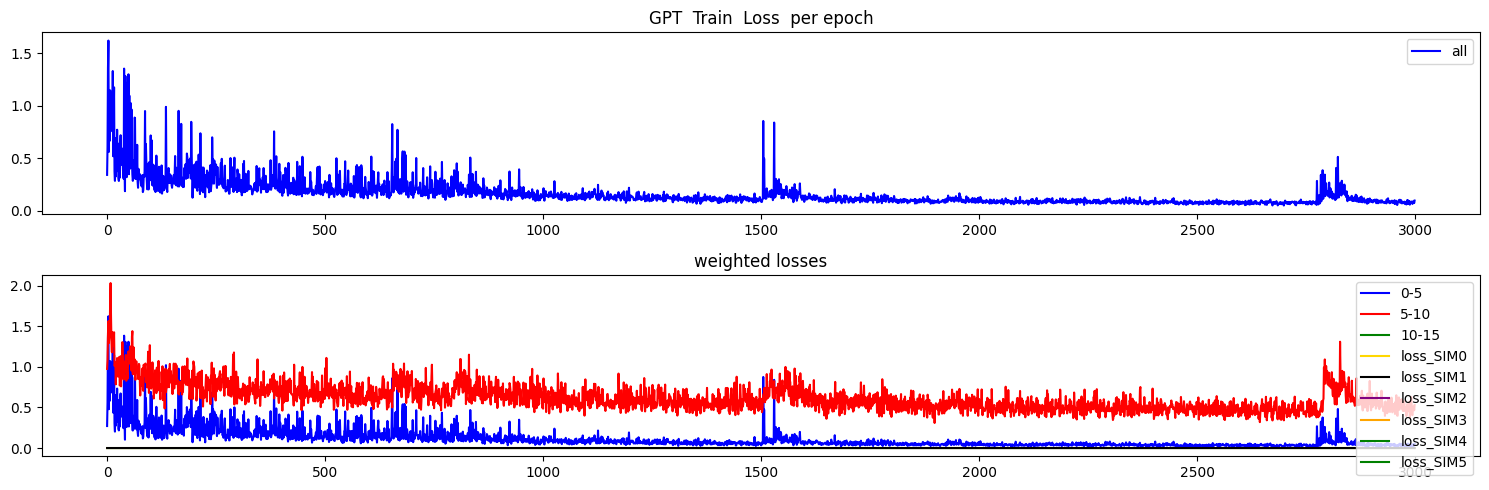

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


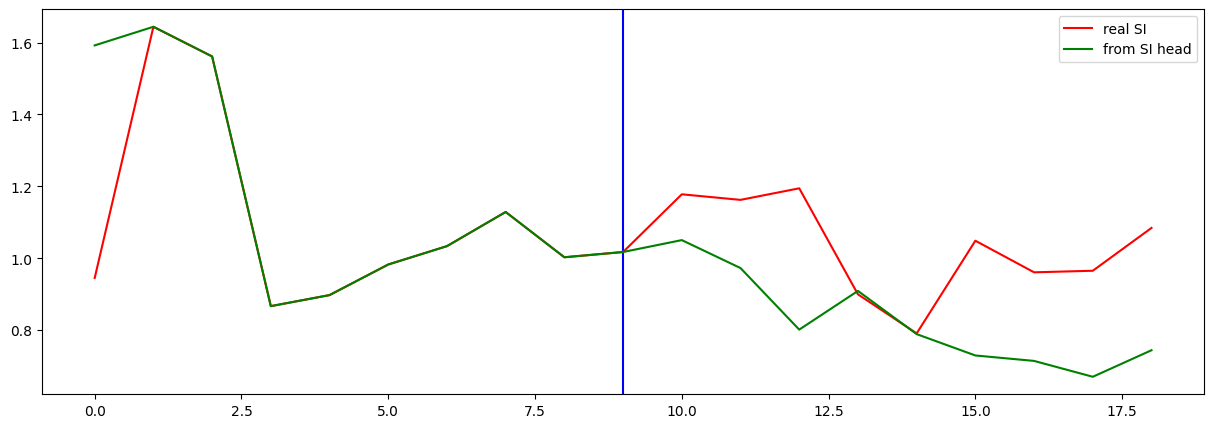

Testing R**2 - (all) - (no inputs):  0.9615631419548146
Testing R**2 - (f2) - SI full (no inputs):  -2.831872548470908
Testing R**2 - SI head only (no inputs):  -2.617450190170826
0 ...index R**2 (no inputs):  -0.2532261415523114
1 ...index R**2 (no inputs):  -0.11761055021388378
2 ...index R**2 (no inputs):  -2.831872548470908
3 ...index R**2 (no inputs):  -8.62324724883137
4 ...index R**2 (no inputs):  -112.39581087363773
5 ...index R**2 (no inputs):  -8.231755871641521
6 ...index R**2 (no inputs):  -94.86936288339507
7 ...index R**2 (no inputs):  -117.93851145293586
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.24314749604721952
10 ...index R**2 (no inputs):  -0.21984364765424225
11 ...index R**2 (no inputs):  -264.3125189291316
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5086068720340442
16 ...index R**2 (no inputs):  -0.008215421270792778
17 ...index R**2 (no inputs)

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.467675
Loss_SI: 0.38042542338371277 Loss_all: 1.252925157546997
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.516535
Loss_SI: 0.4499855041503906 Loss_all: 1.1154836416244507
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.132529
Loss_SI: 0.08493886888027191 Loss_all: 0.5608385801315308
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.136823
Loss_SI: 0.08227933943271637 Loss_all: 0.6277180910110474
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.182910
Loss_SI: 0.12434883415699005 Loss_all: 0.7099632024765015
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.104234
Loss_SI: 0.044142864644527435 Loss_all: 0.6450528502464294
Prediction shape: torch.Size([32, 35])
===


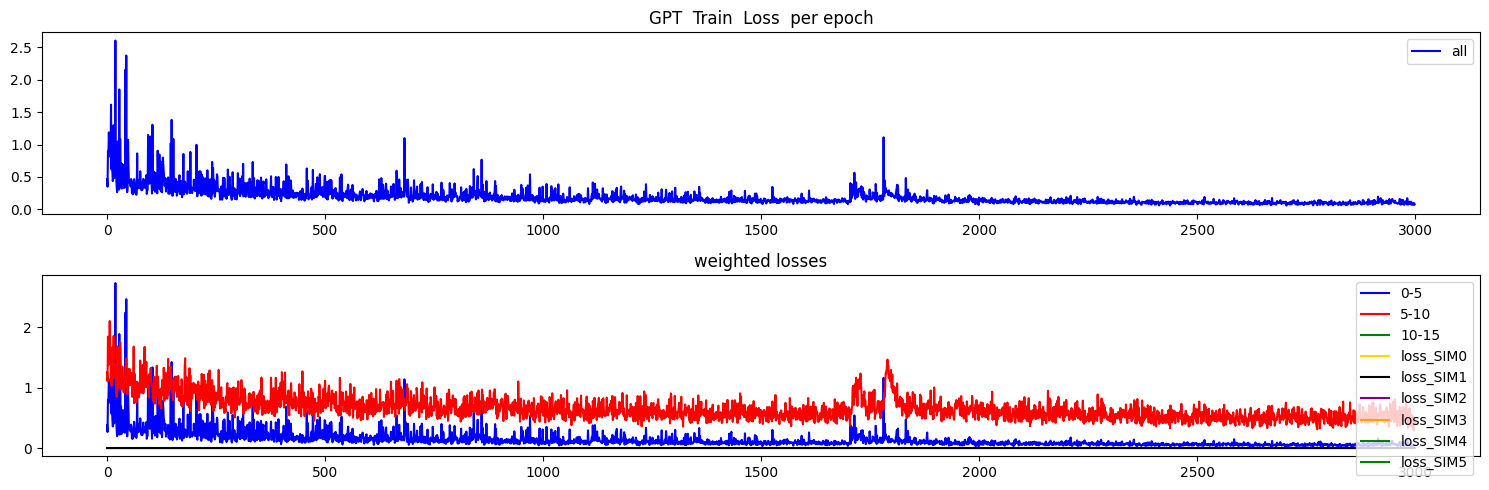

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


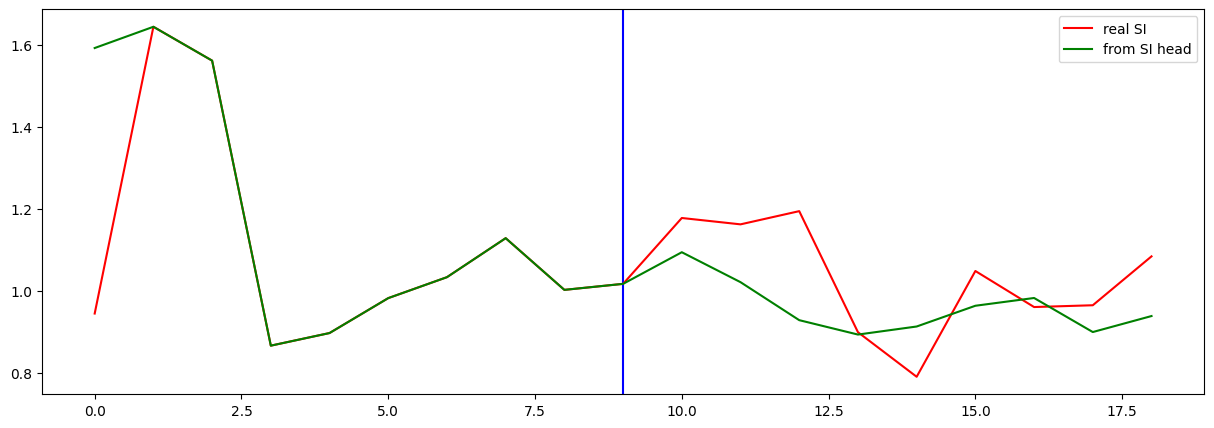

Testing R**2 - (all) - (no inputs):  0.910934950928669
Testing R**2 - (f2) - SI full (no inputs):  -0.25910885434083286
Testing R**2 - SI head only (no inputs):  0.25788881377568784
0 ...index R**2 (no inputs):  -0.2784012767576589
1 ...index R**2 (no inputs):  -1.3517985931420453
2 ...index R**2 (no inputs):  -0.25910885434083286
3 ...index R**2 (no inputs):  -0.3455902143360394
4 ...index R**2 (no inputs):  -2460.895466464141
5 ...index R**2 (no inputs):  -20.5721939029287
6 ...index R**2 (no inputs):  -518.7495762338949
7 ...index R**2 (no inputs):  -647.2874621342226
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.12131909524397289
10 ...index R**2 (no inputs):  0.08605244692418024
11 ...index R**2 (no inputs):  -742.7723423208645
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.852182846981121
16 ...index R**2 (no inputs):  -0.8089879858377862
17 ...index R**2 (no inputs):  

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.538741
Loss_SI: 0.46574634313583374 Loss_all: 1.1956881284713745
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.076407
Loss_SI: 0.016804978251457214 Loss_all: 0.612821102142334
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.054696
Loss_SI: 0.01691560074687004 Loss_all: 0.39472436904907227
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.060169
Loss_SI: 0.013842880725860596 Loss_all: 0.47710639238357544
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.035520
Loss_SI: 0.007136296946555376 Loss_all: 0.2909684181213379
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.043258
Loss_SI: 0.012636825442314148 Loss_all: 0.31885311007499695
Prediction shape: torch.Size([32, 35])
===


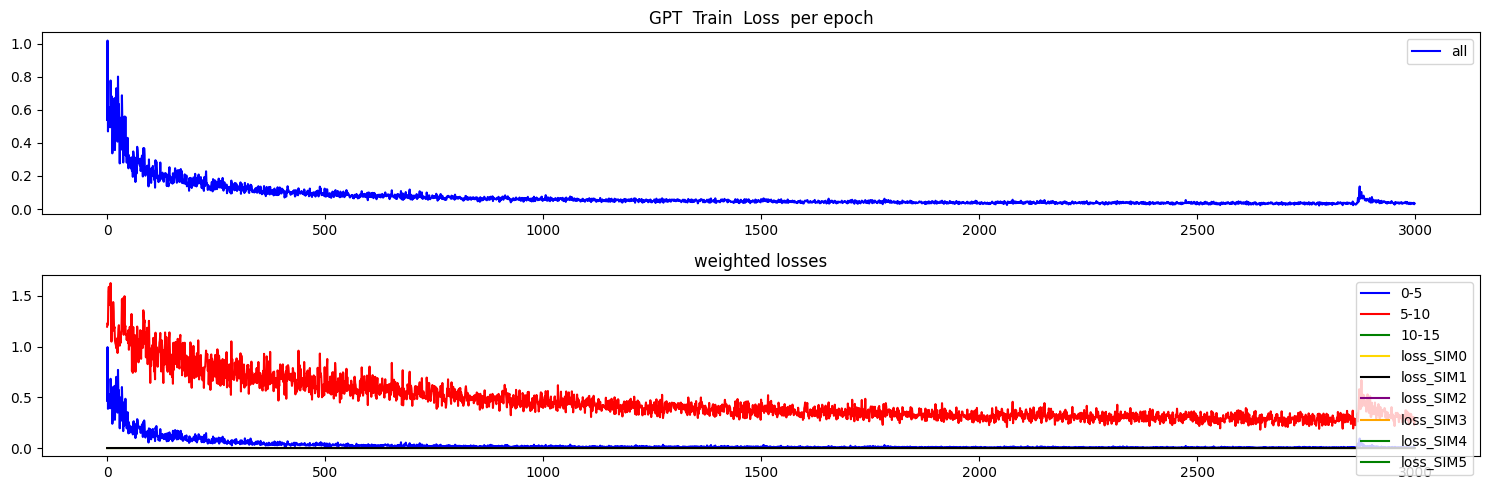

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


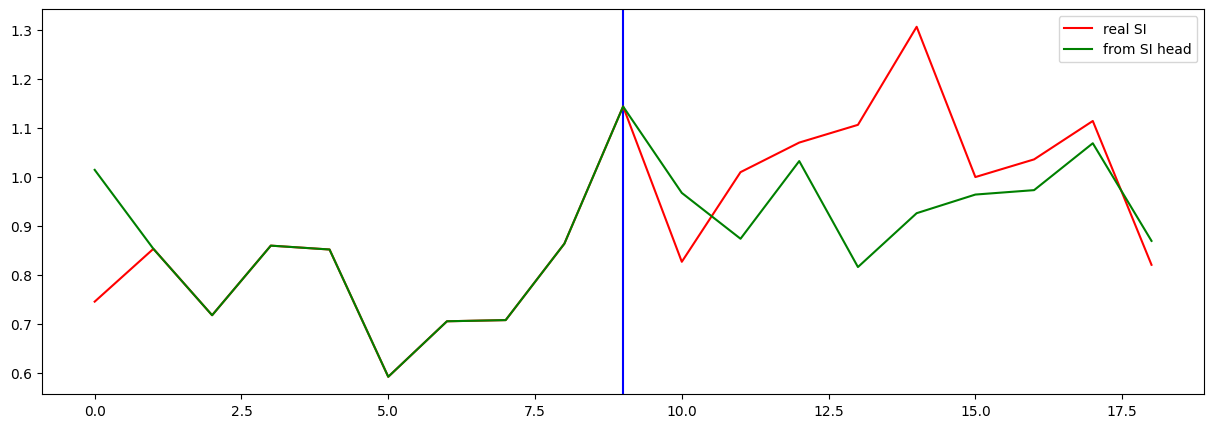

Testing R**2 - (all) - (no inputs):  0.9462559160781931
Testing R**2 - (f2) - SI full (no inputs):  -1.2881888593588737
Testing R**2 - SI head only (no inputs):  -0.8170443227103819
0 ...index R**2 (no inputs):  -2.8588586864038534
1 ...index R**2 (no inputs):  -0.9814602397026198
2 ...index R**2 (no inputs):  -1.2881888593588737
3 ...index R**2 (no inputs):  -2.2748813412822497
4 ...index R**2 (no inputs):  0.00496075023752196
5 ...index R**2 (no inputs):  -0.17894613514925406
6 ...index R**2 (no inputs):  -55.509654202762086
7 ...index R**2 (no inputs):  -93862.42652045569
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.02093959584478
10 ...index R**2 (no inputs):  0.014320183330963077
11 ...index R**2 (no inputs):  -11.349884827931723
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9921351687341513
16 ...index R**2 (no inputs):  -2.730612750842278
17 ...index R**2 (no inputs

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.548153
Loss_SI: 0.45611560344696045 Loss_all: 1.3764902353286743
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.207068
Loss_SI: 0.13693052530288696 Loss_all: 0.8383049368858337
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.126060
Loss_SI: 0.059430669993162155 Loss_all: 0.7257229685783386
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.073120
Loss_SI: 0.021740123629570007 Loss_all: 0.535534679889679
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066258
Loss_SI: 0.021708540618419647 Loss_all: 0.46719908714294434
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.072588
Loss_SI: 0.019246241077780724 Loss_all: 0.5526623725891113
Prediction shape: torch.Size([32, 35])
===


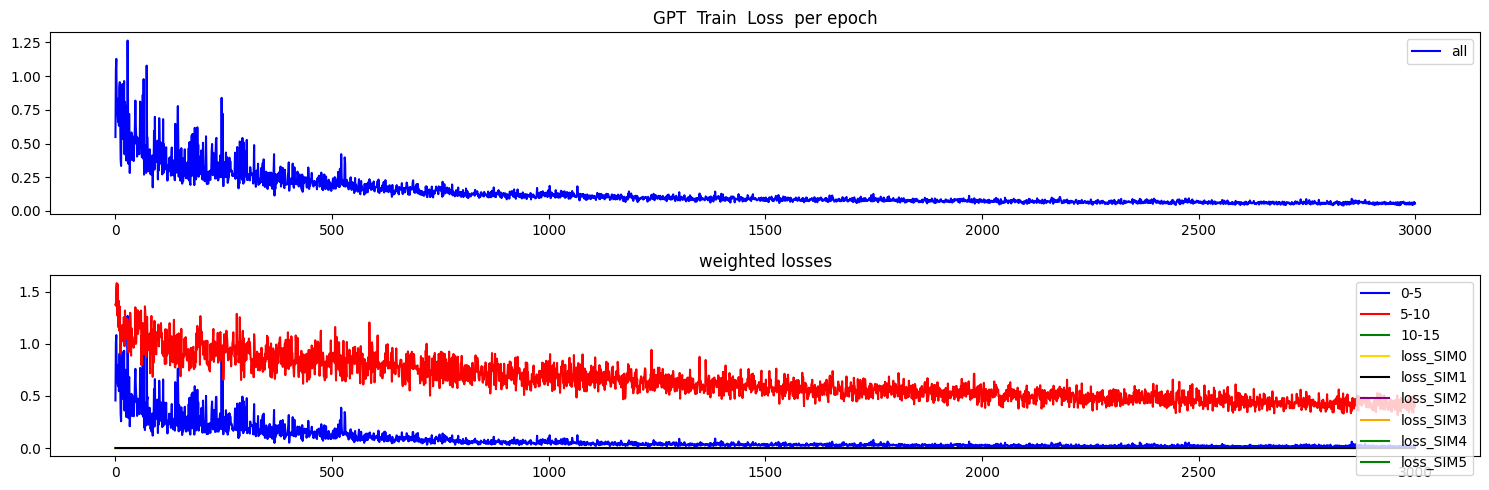

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


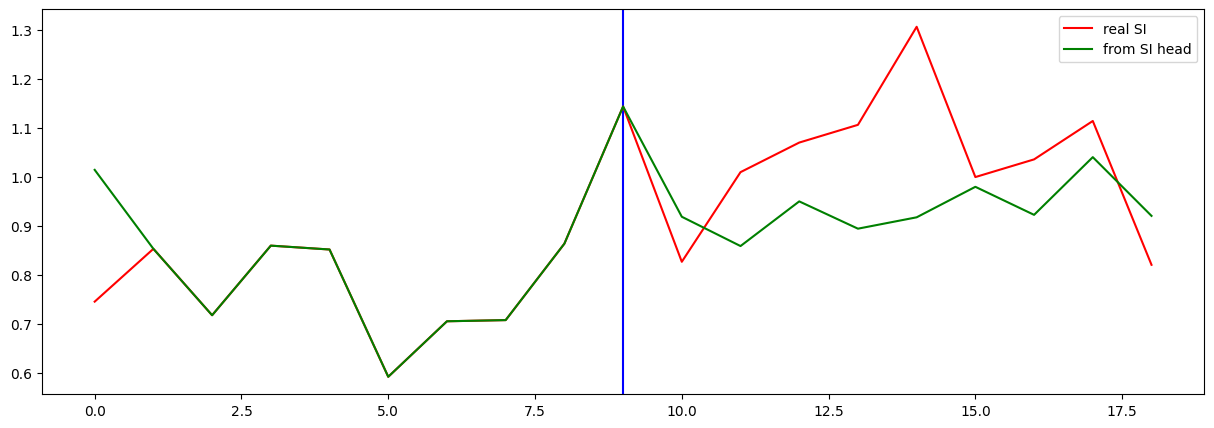

Testing R**2 - (all) - (no inputs):  0.9466220347251217
Testing R**2 - (f2) - SI full (no inputs):  -0.6386915983315795
Testing R**2 - SI head only (no inputs):  -0.719708581746632
0 ...index R**2 (no inputs):  -1.6068157232646554
1 ...index R**2 (no inputs):  -0.8182229767860587
2 ...index R**2 (no inputs):  -0.6386915983315795
3 ...index R**2 (no inputs):  -3.8253314305505297
4 ...index R**2 (no inputs):  -0.6796989602880716
5 ...index R**2 (no inputs):  -0.17053355567906725
6 ...index R**2 (no inputs):  -8.886766685608825
7 ...index R**2 (no inputs):  -149484.45163467914
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9796074556442136
10 ...index R**2 (no inputs):  0.42392744123042025
11 ...index R**2 (no inputs):  -12.86209406455358
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.561836400507004
16 ...index R**2 (no inputs):  -0.4090709607952241
17 ...index R**2 (no inputs)

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.549085
Loss_SI: 0.4657057821750641 Loss_all: 1.2994942665100098
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.128627
Loss_SI: 0.07532577216625214 Loss_all: 0.6083412170410156
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.127960
Loss_SI: 0.08144393563270569 Loss_all: 0.5466035008430481
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.077190
Loss_SI: 0.0362057164311409 Loss_all: 0.4460442066192627
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.080792
Loss_SI: 0.030858829617500305 Loss_all: 0.5301925539970398
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.079102
Loss_SI: 0.038438692688941956 Loss_all: 0.44507092237472534
Prediction shape: torch.Size([32, 35])
===


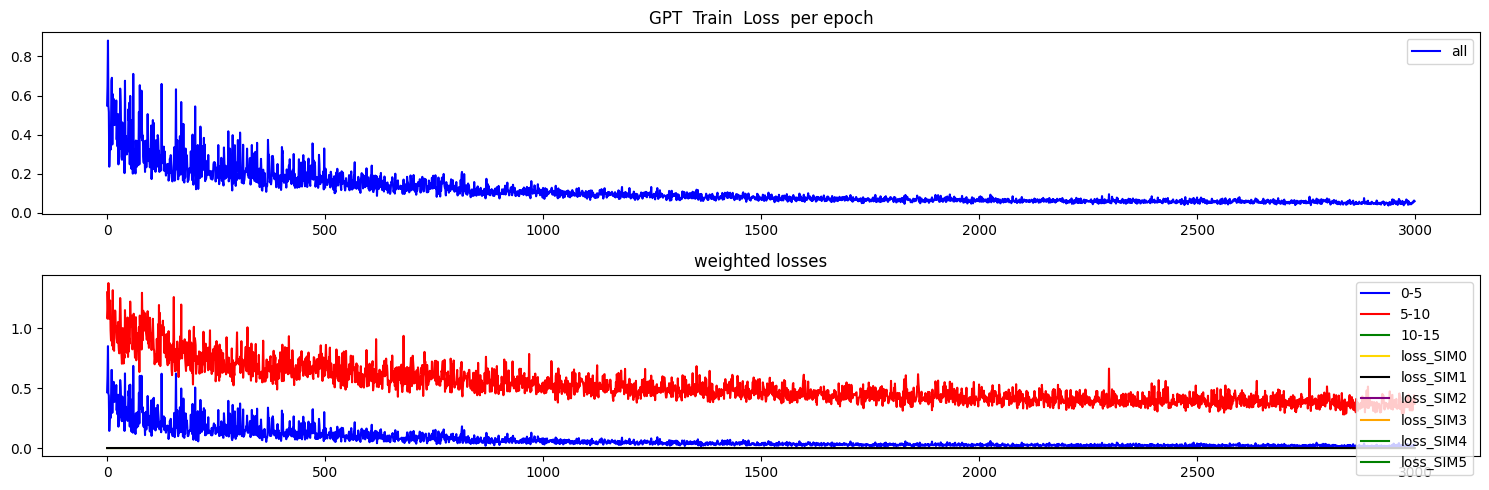

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


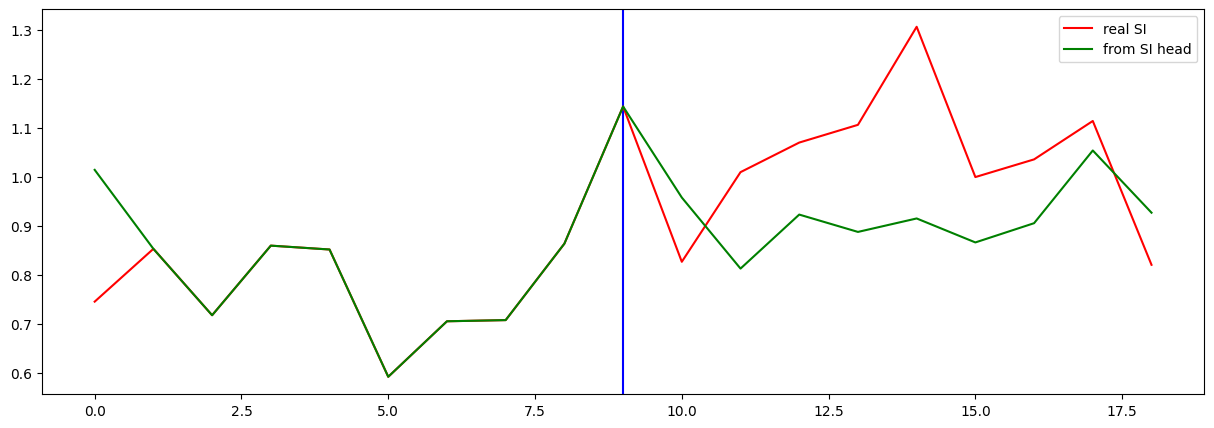

Testing R**2 - (all) - (no inputs):  0.9109311655472746
Testing R**2 - (f2) - SI full (no inputs):  -1.0215376588212552
Testing R**2 - SI head only (no inputs):  -1.0512425728722707
0 ...index R**2 (no inputs):  -0.37792771950464465
1 ...index R**2 (no inputs):  -1.2203874922301217
2 ...index R**2 (no inputs):  -1.0215376588212552
3 ...index R**2 (no inputs):  -1.0169124434873482
4 ...index R**2 (no inputs):  0.0960758610900595
5 ...index R**2 (no inputs):  -0.9541232036540999
6 ...index R**2 (no inputs):  -287.1076125879385
7 ...index R**2 (no inputs):  -218925.09847614757
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3855441358722898
10 ...index R**2 (no inputs):  -0.6799917134979545
11 ...index R**2 (no inputs):  -3.051585568115115
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.733740875620294
16 ...index R**2 (no inputs):  -9.408083221469116
17 ...index R**2 (no inputs):

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.707129
Loss_SI: 0.6170945167541504 Loss_all: 1.5174424648284912
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.317741
Loss_SI: 0.27153241634368896 Loss_all: 0.7336210608482361
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.289825
Loss_SI: 0.23760339617729187 Loss_all: 0.7598151564598083
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.102996
Loss_SI: 0.03627127408981323 Loss_all: 0.7035179734230042
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.105633
Loss_SI: 0.04875560104846954 Loss_all: 0.617533802986145
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.112504
Loss_SI: 0.055893369019031525 Loss_all: 0.6219961047172546
Prediction shape: torch.Size([32, 35])
===


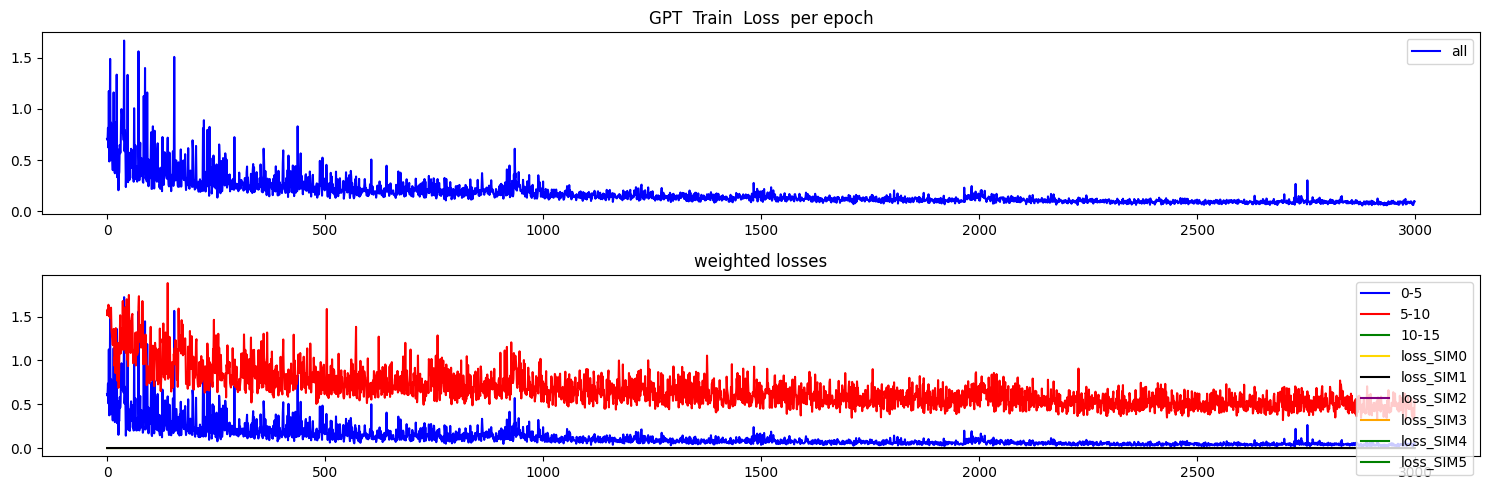

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


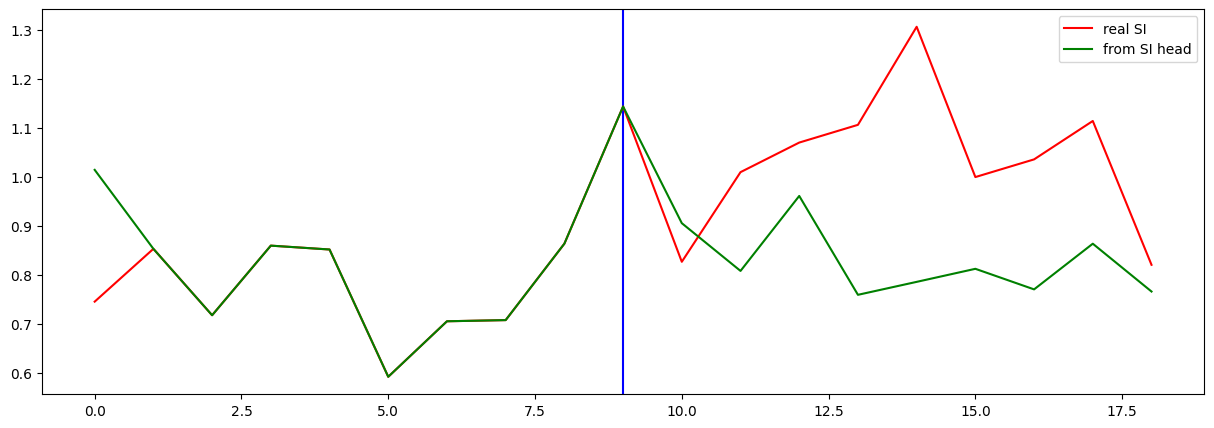

Testing R**2 - (all) - (no inputs):  0.7791336891203905
Testing R**2 - (f2) - SI full (no inputs):  -3.955882120325043
Testing R**2 - SI head only (no inputs):  -1.8422046151109939
0 ...index R**2 (no inputs):  -1.370965049661355
1 ...index R**2 (no inputs):  -2.1753108351721027
2 ...index R**2 (no inputs):  -3.955882120325043
3 ...index R**2 (no inputs):  -3.0987760967554614
4 ...index R**2 (no inputs):  -12.955474104284693
5 ...index R**2 (no inputs):  -3.8450108979533484
6 ...index R**2 (no inputs):  -72.66323530844994
7 ...index R**2 (no inputs):  -182610.89402801206
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.059970893548131565
10 ...index R**2 (no inputs):  0.07249480730252889
11 ...index R**2 (no inputs):  -319.09511892000836
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.479679780752369
16 ...index R**2 (no inputs):  -20.898735024380844
17 ...index R**2 (no inputs):

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.694022
Loss_SI: 0.6435623168945312 Loss_all: 1.1481598615646362
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.101351
Loss_SI: 0.03929954022169113 Loss_all: 0.6598140001296997
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.067994
Loss_SI: 0.015362551435828209 Loss_all: 0.5416731238365173
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.058073
Loss_SI: 0.015307590365409851 Loss_all: 0.442958801984787
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.044360
Loss_SI: 0.014165768399834633 Loss_all: 0.31610530614852905
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.032836
Loss_SI: 0.007141344249248505 Loss_all: 0.26408901810646057
Prediction shape: torch.Size([32, 35])
===


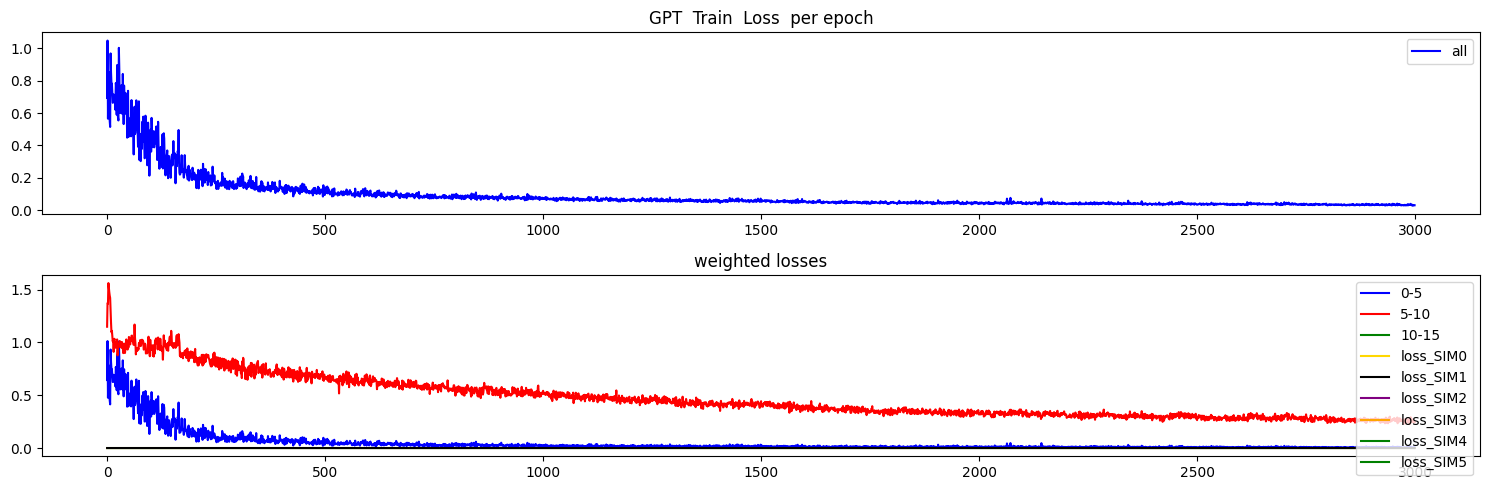

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


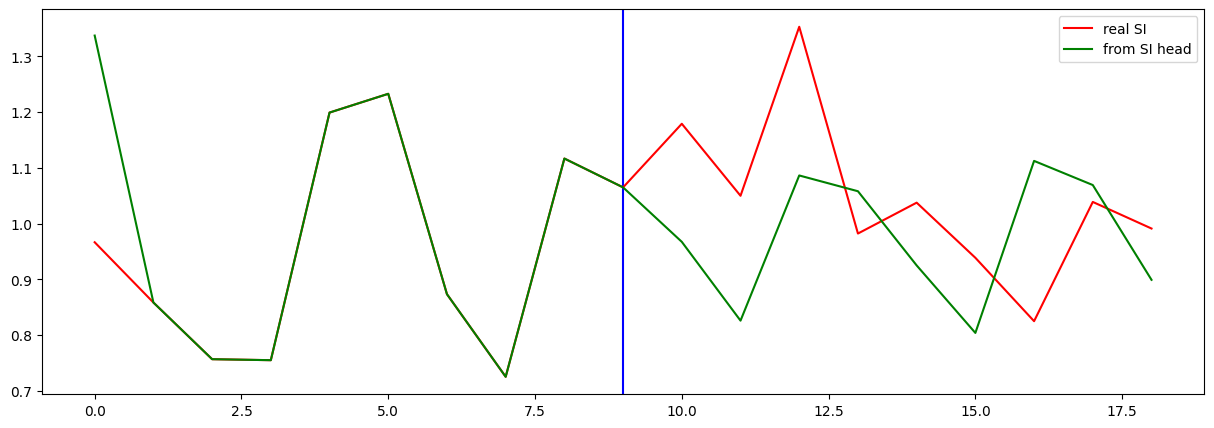

Testing R**2 - (all) - (no inputs):  0.9950701222147671
Testing R**2 - (f2) - SI full (no inputs):  -2.3324625003874475
Testing R**2 - SI head only (no inputs):  -0.926851644979102
0 ...index R**2 (no inputs):  -1.4653580983756256
1 ...index R**2 (no inputs):  -0.7362656635973899
2 ...index R**2 (no inputs):  -2.3324625003874475
3 ...index R**2 (no inputs):  -0.004915668789309491
4 ...index R**2 (no inputs):  -0.35379304792227595
5 ...index R**2 (no inputs):  -0.7559607529045544
6 ...index R**2 (no inputs):  -0.43665237547524405
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5303012663459019
10 ...index R**2 (no inputs):  0.27024987882232987
11 ...index R**2 (no inputs):  -14.628079925288946
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.27691155565679
16 ...index R**2 (no inputs):  -5.226077215231918
17 ...index R**2 (no inputs):  -15.99623

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.795794
Loss_SI: 0.7371730804443359 Loss_all: 1.3233857154846191
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.165467
Loss_SI: 0.08929932117462158 Loss_all: 0.8509755730628967
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.099212
Loss_SI: 0.043385621160268784 Loss_all: 0.6016502380371094
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.088104
Loss_SI: 0.032885659486055374 Loss_all: 0.5850734710693359
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.061995
Loss_SI: 0.013604800216853619 Loss_all: 0.49750351905822754
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.064971
Loss_SI: 0.029913954436779022 Loss_all: 0.3804795444011688
Prediction shape: torch.Size([32, 35])
===


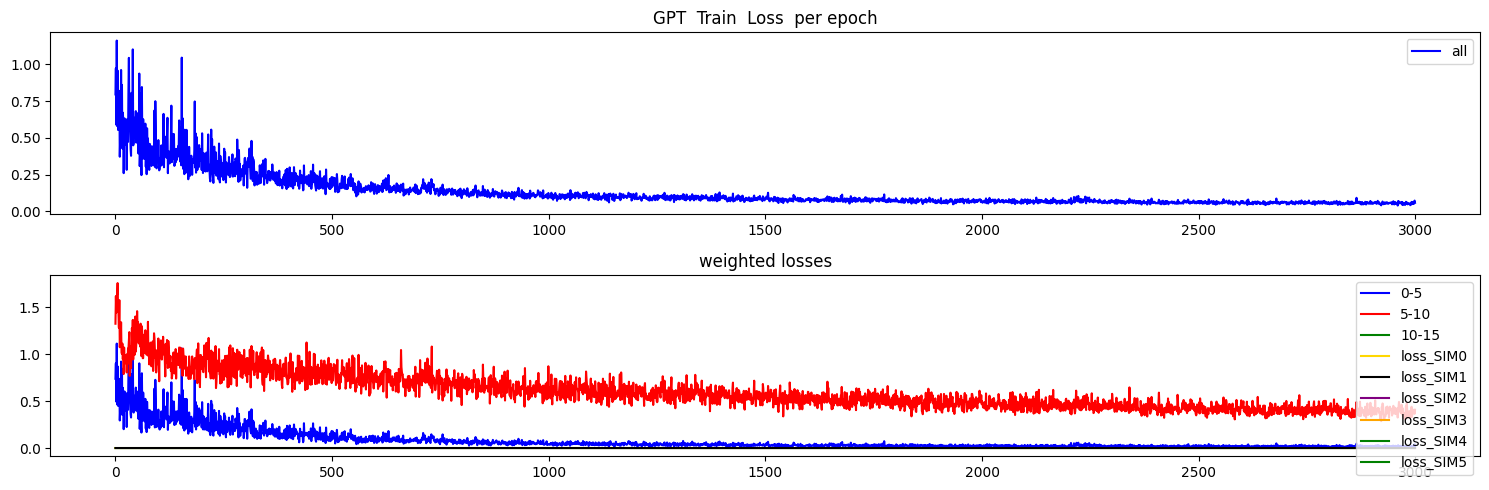

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


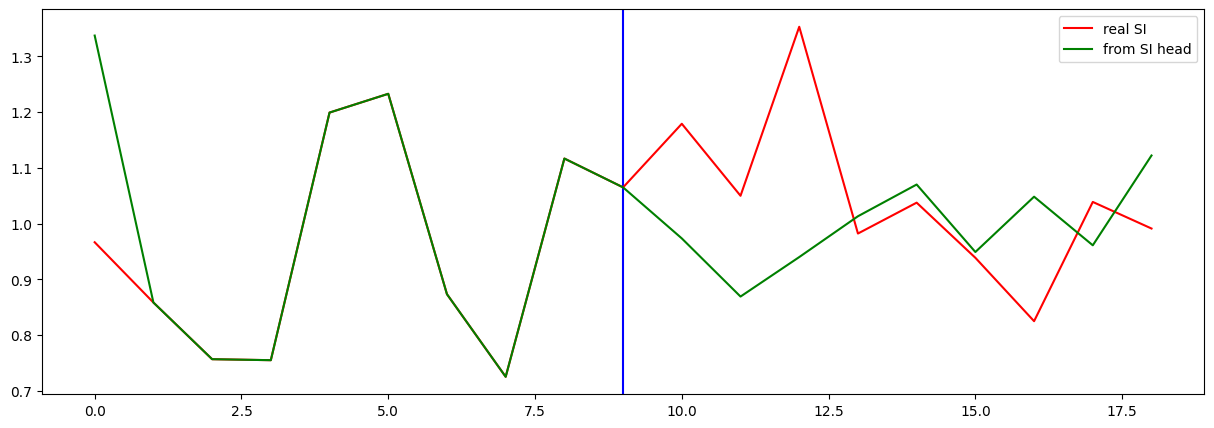

Testing R**2 - (all) - (no inputs):  0.9942442992849877
Testing R**2 - (f2) - SI full (no inputs):  -0.9584613398173429
Testing R**2 - SI head only (no inputs):  -0.8507639915828766
0 ...index R**2 (no inputs):  -0.5124805392623724
1 ...index R**2 (no inputs):  -0.4418421372107837
2 ...index R**2 (no inputs):  -0.9584613398173429
3 ...index R**2 (no inputs):  -1.1191150508067875
4 ...index R**2 (no inputs):  -0.13806858149361134
5 ...index R**2 (no inputs):  -1.034962724713962
6 ...index R**2 (no inputs):  -0.15594590371928563
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.023590488932917042
10 ...index R**2 (no inputs):  -0.16465131360803897
11 ...index R**2 (no inputs):  -8.556234525288467
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.413523886497568
16 ...index R**2 (no inputs):  -2.6672942650006712
17 ...index R**2 (no inputs):  -60.5538

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.792931
Loss_SI: 0.6990764737129211 Loss_all: 1.6376217603683472
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.280420
Loss_SI: 0.22939972579479218 Loss_all: 0.7396042943000793
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.157738
Loss_SI: 0.09026005119085312 Loss_all: 0.7650403380393982
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110889
Loss_SI: 0.06009146571159363 Loss_all: 0.568071722984314
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099373
Loss_SI: 0.04621858149766922 Loss_all: 0.5777630805969238
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102663
Loss_SI: 0.05589040368795395 Loss_all: 0.5236126780509949
Prediction shape: torch.Size([32, 35])
===


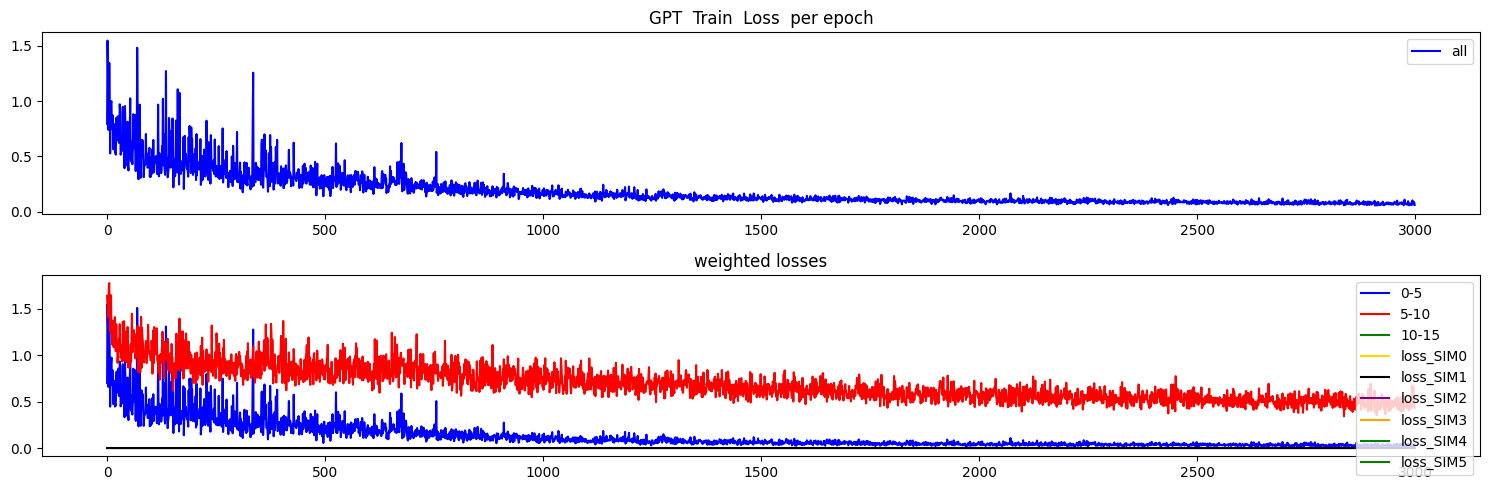

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


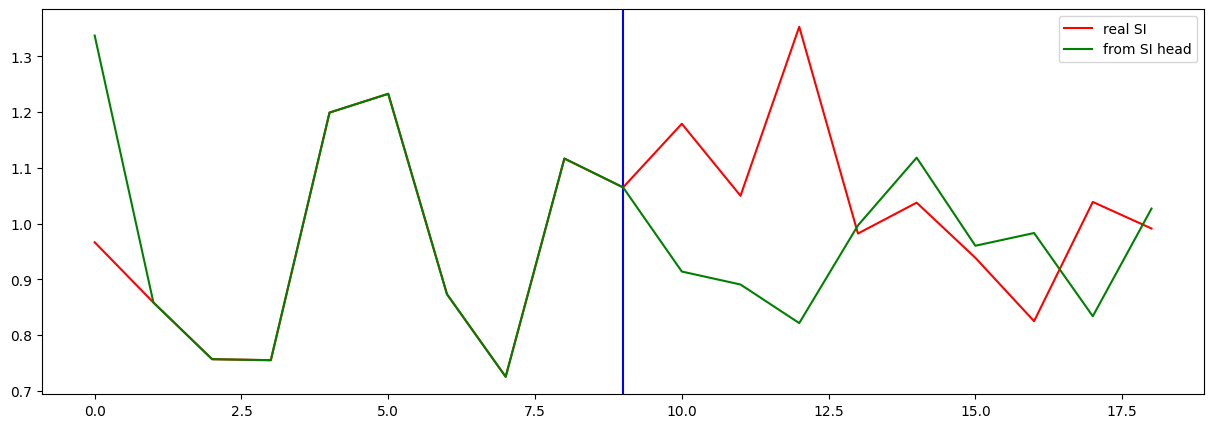

Testing R**2 - (all) - (no inputs):  0.9795991826030199
Testing R**2 - (f2) - SI full (no inputs):  -0.7652334108244543
Testing R**2 - SI head only (no inputs):  -1.1062856372588166
0 ...index R**2 (no inputs):  -0.6882669854196382
1 ...index R**2 (no inputs):  -0.7230077977639091
2 ...index R**2 (no inputs):  -0.7652334108244543
3 ...index R**2 (no inputs):  -3.7725905505346082
4 ...index R**2 (no inputs):  -0.49735220239236844
5 ...index R**2 (no inputs):  -6.277783091396946
6 ...index R**2 (no inputs):  -0.04106074757302425
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19326566784703347
10 ...index R**2 (no inputs):  0.3067844425942242
11 ...index R**2 (no inputs):  -96.5276867559439
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.073448345511505
16 ...index R**2 (no inputs):  -4.13612212455731
17 ...index R**2 (no inputs):  -208.500858908

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.868003
Loss_SI: 0.8238505721092224 Loss_all: 1.2653782367706299
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.225528
Loss_SI: 0.158925861120224 Loss_all: 0.8249468803405762
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.169381
Loss_SI: 0.07443050295114517 Loss_all: 1.0239356756210327
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.142686
Loss_SI: 0.09072960168123245 Loss_all: 0.6102911233901978
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.138569
Loss_SI: 0.08005252480506897 Loss_all: 0.665216863155365
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.110272
Loss_SI: 0.06347855925559998 Loss_all: 0.531410276889801
Prediction shape: torch.Size([32, 35])
===


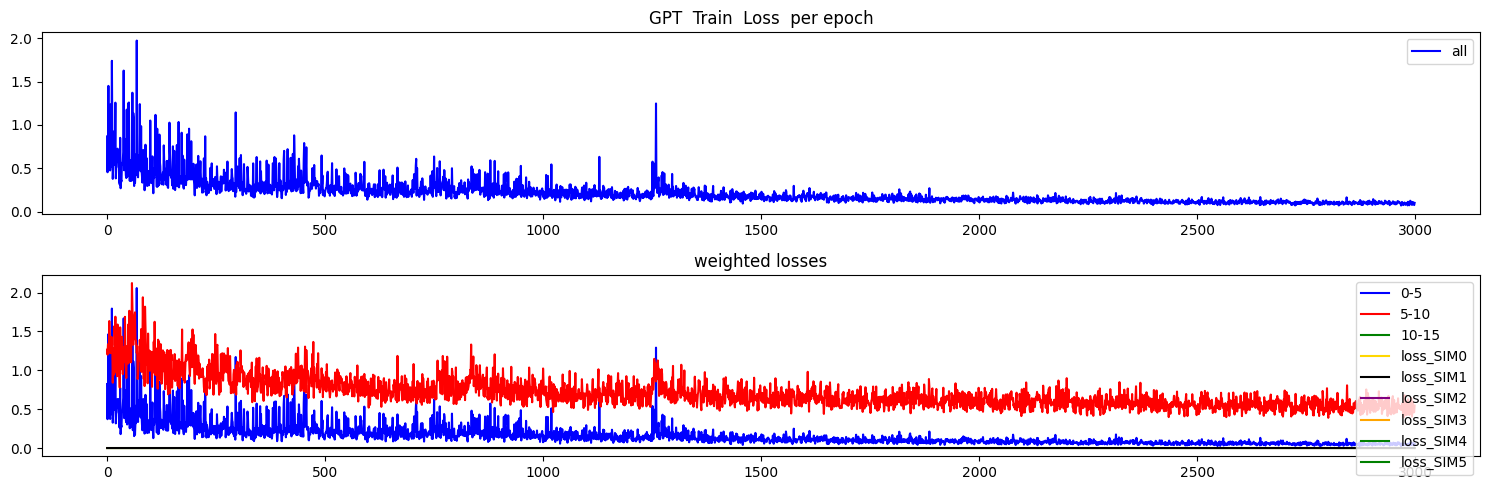

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


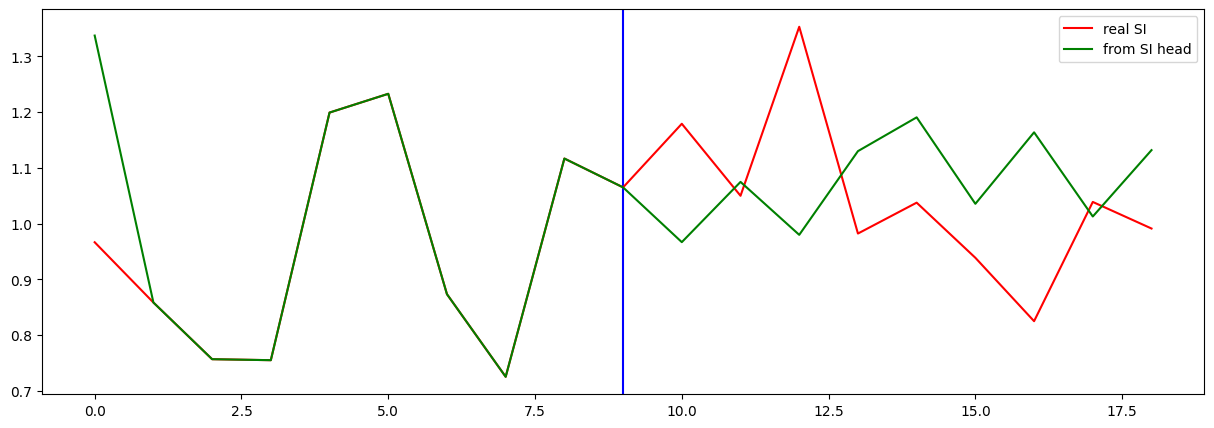

Testing R**2 - (all) - (no inputs):  0.9461677991191522
Testing R**2 - (f2) - SI full (no inputs):  -0.8025483302450729
Testing R**2 - SI head only (no inputs):  -0.5040411112269865
0 ...index R**2 (no inputs):  -0.252755323090309
1 ...index R**2 (no inputs):  -0.09960974088555674
2 ...index R**2 (no inputs):  -0.8025483302450729
3 ...index R**2 (no inputs):  -2.638410234911558
4 ...index R**2 (no inputs):  -7.7720273275072245
5 ...index R**2 (no inputs):  -18.305031434773905
6 ...index R**2 (no inputs):  -0.14019872774344067
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0941881470286694
10 ...index R**2 (no inputs):  -0.8438951231430354
11 ...index R**2 (no inputs):  -90.60626697867642
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3679173347376552
16 ...index R**2 (no inputs):  -2.126593843655393
17 ...index R**2 (no inputs):  -16.23998463

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.565702
Loss_SI: 0.502724826335907 Loss_all: 1.132493019104004
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.115186
Loss_SI: 0.05900852382183075 Loss_all: 0.6207833290100098
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.068693
Loss_SI: 0.023625262081623077 Loss_all: 0.4743020534515381
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.052815
Loss_SI: 0.012800508178770542 Loss_all: 0.4129405915737152
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.038843
Loss_SI: 0.009023652411997318 Loss_all: 0.307212769985199
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039493
Loss_SI: 0.010114630684256554 Loss_all: 0.3038996756076813
Prediction shape: torch.Size([32, 35])
===


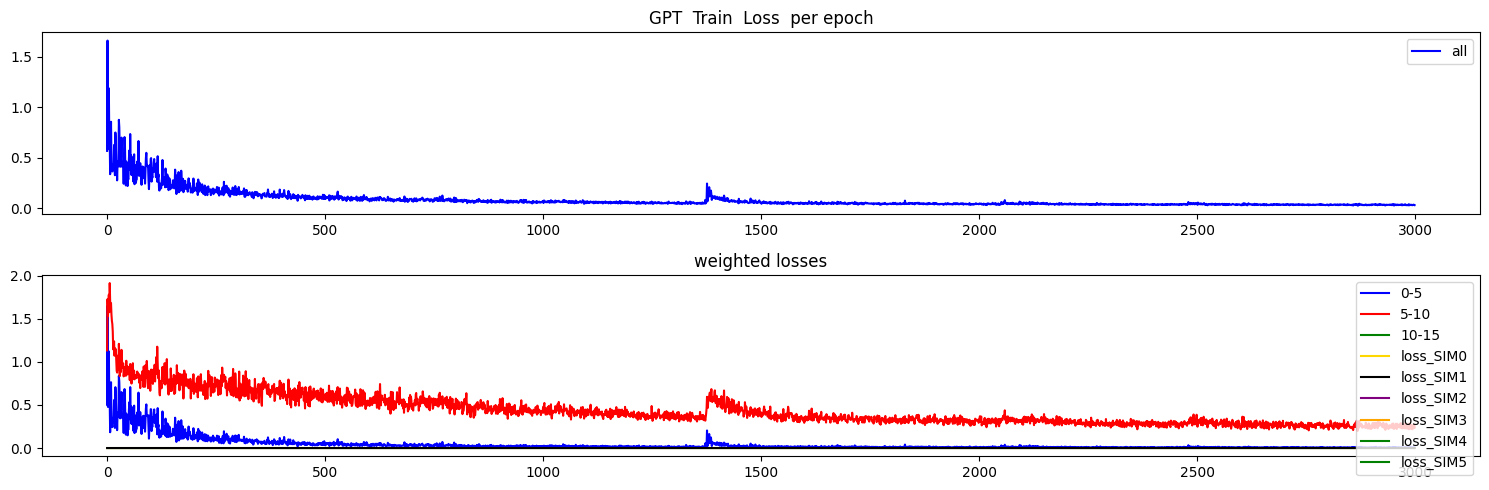

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


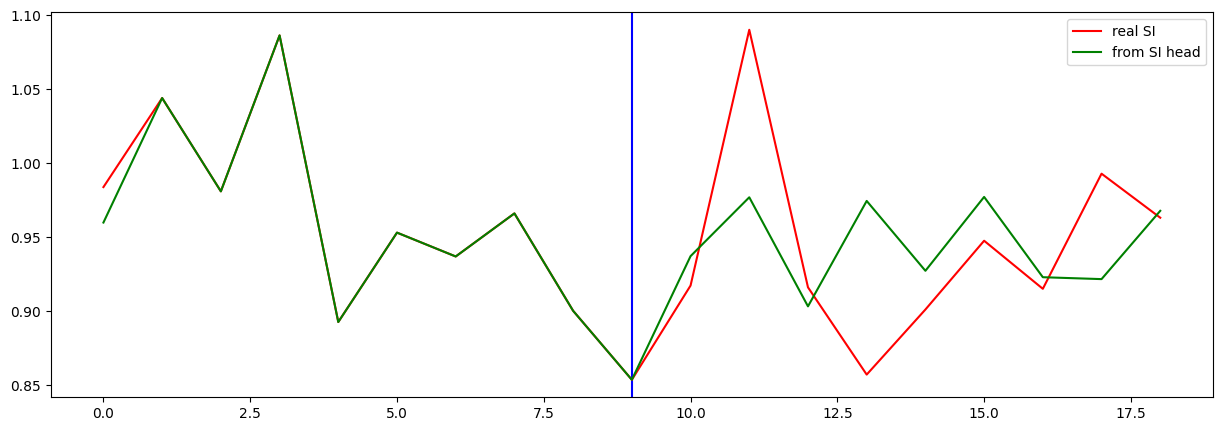

Testing R**2 - (all) - (no inputs):  0.9966144279440784
Testing R**2 - (f2) - SI full (no inputs):  -2.1729790142359056
Testing R**2 - SI head only (no inputs):  -0.265608768141669
0 ...index R**2 (no inputs):  -1.3430711795146597
1 ...index R**2 (no inputs):  -0.8438327307608231
2 ...index R**2 (no inputs):  -2.1729790142359056
3 ...index R**2 (no inputs):  -32.27451638913965
4 ...index R**2 (no inputs):  -2.543466539682641
5 ...index R**2 (no inputs):  -2.044027222646323
6 ...index R**2 (no inputs):  -1.7056807781537806
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.3490735392974034
10 ...index R**2 (no inputs):  -1.742189524551172
11 ...index R**2 (no inputs):  -0.7956300695028584
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.270851143237014
16 ...index R**2 (no inputs):  -0.29838630136707156
17 ...index R**2 (no inputs):  -1.071030723323

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.040180
Loss_SI: 1.0144010782241821 Loss_all: 1.2721948623657227
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.191973
Loss_SI: 0.11428879201412201 Loss_all: 0.8911353945732117
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.132254
Loss_SI: 0.07161933928728104 Loss_all: 0.6779658794403076
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.090451
Loss_SI: 0.03494896739721298 Loss_all: 0.5899667143821716
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.088999
Loss_SI: 0.03968667611479759 Loss_all: 0.5328097939491272
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.051100
Loss_SI: 0.011497399769723415 Loss_all: 0.40752509236335754
Prediction shape: torch.Size([32, 35])
===


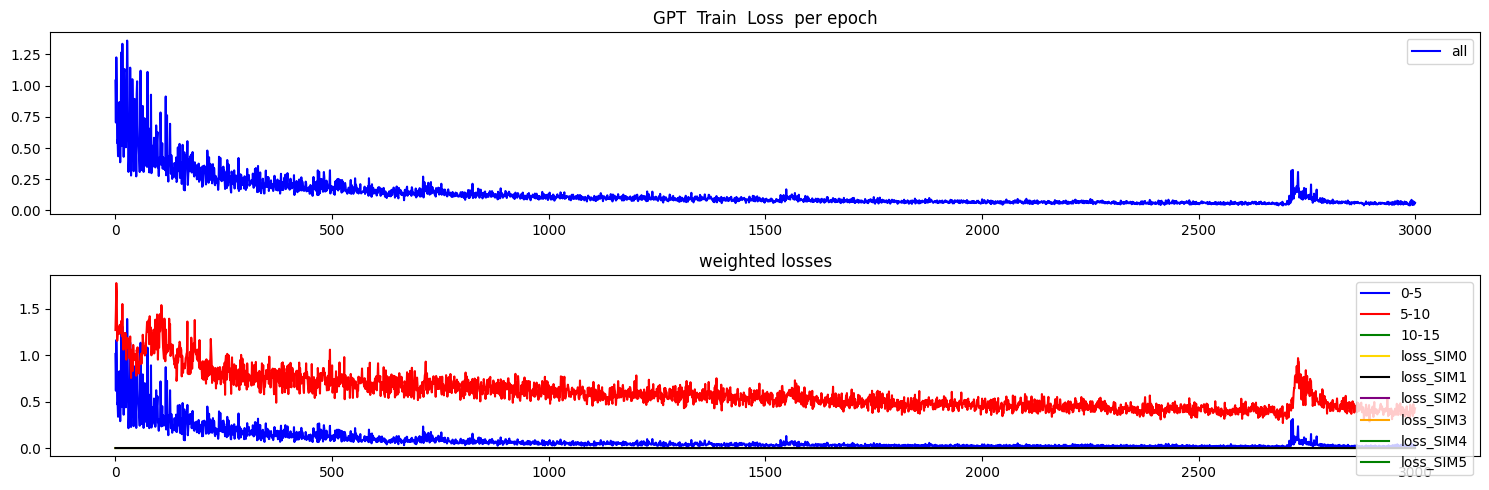

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


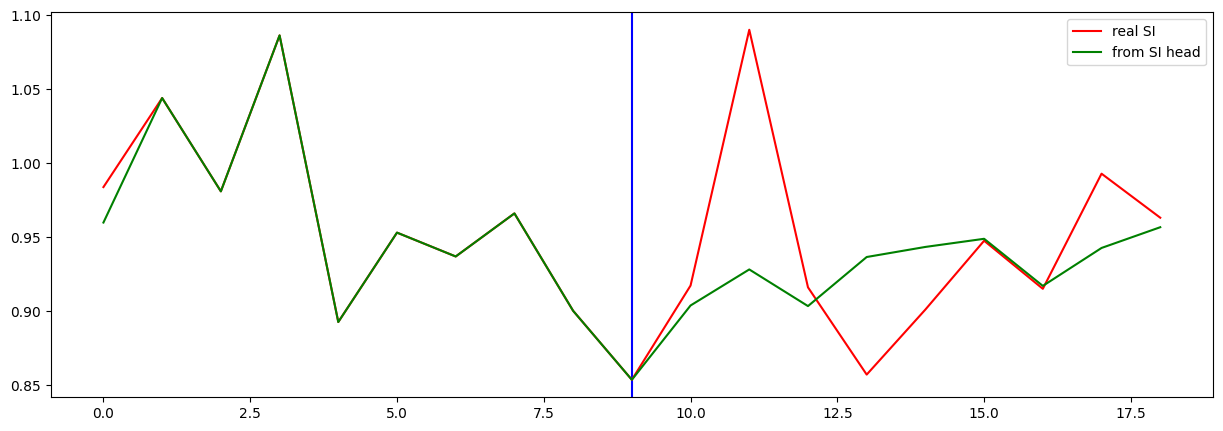

Testing R**2 - (all) - (no inputs):  0.9979588993806868
Testing R**2 - (f2) - SI full (no inputs):  -0.4428694011358085
Testing R**2 - SI head only (no inputs):  -0.2811840339645433
0 ...index R**2 (no inputs):  -0.01024170091719978
1 ...index R**2 (no inputs):  0.10861288642704114
2 ...index R**2 (no inputs):  -0.4428694011358085
3 ...index R**2 (no inputs):  -46.19816403298604
4 ...index R**2 (no inputs):  -4.929789422410883
5 ...index R**2 (no inputs):  -0.8151380828990635
6 ...index R**2 (no inputs):  0.373142481209217
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6438800506811406
10 ...index R**2 (no inputs):  -0.7535261878166957
11 ...index R**2 (no inputs):  -27.83626734030525
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.131429852713107
16 ...index R**2 (no inputs):  -0.38990046250758614
17 ...index R**2 (no inputs):  -22.5985205890

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.161987
Loss_SI: 1.1486374139785767 Loss_all: 1.2821341753005981
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.220628
Loss_SI: 0.15124310553073883 Loss_all: 0.8450906872749329
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.117862
Loss_SI: 0.0630035251379013 Loss_all: 0.6115903258323669
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.083245
Loss_SI: 0.030907459557056427 Loss_all: 0.5542795658111572
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068378
Loss_SI: 0.019363263621926308 Loss_all: 0.509507954120636
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.064028
Loss_SI: 0.028041569516062737 Loss_all: 0.3879081606864929
Prediction shape: torch.Size([32, 35])
===


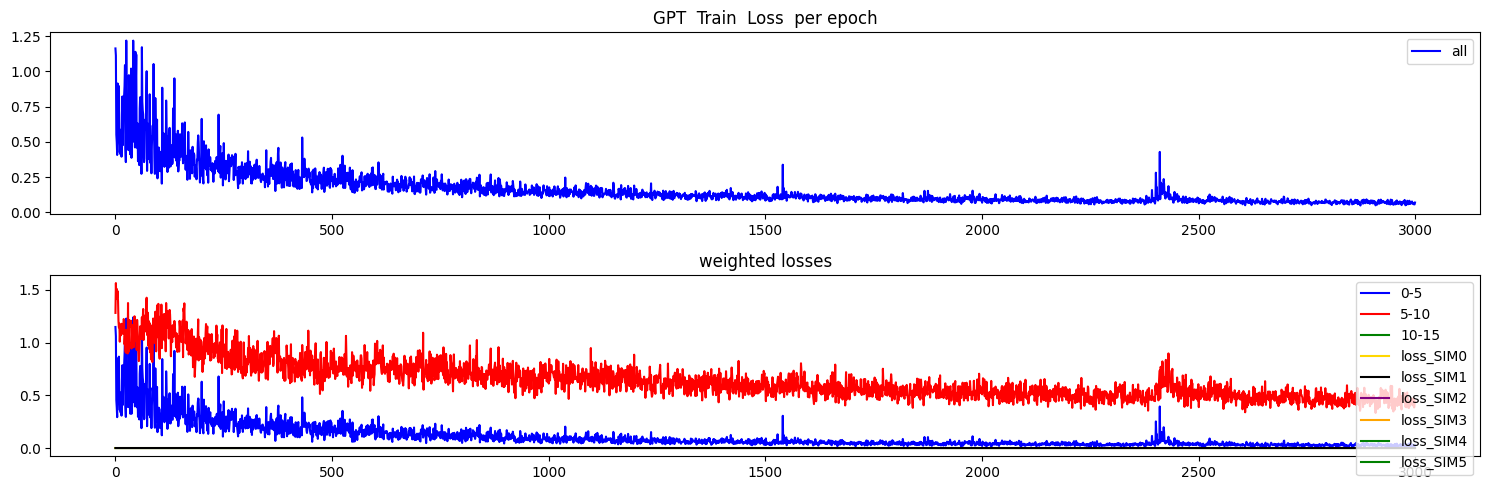

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


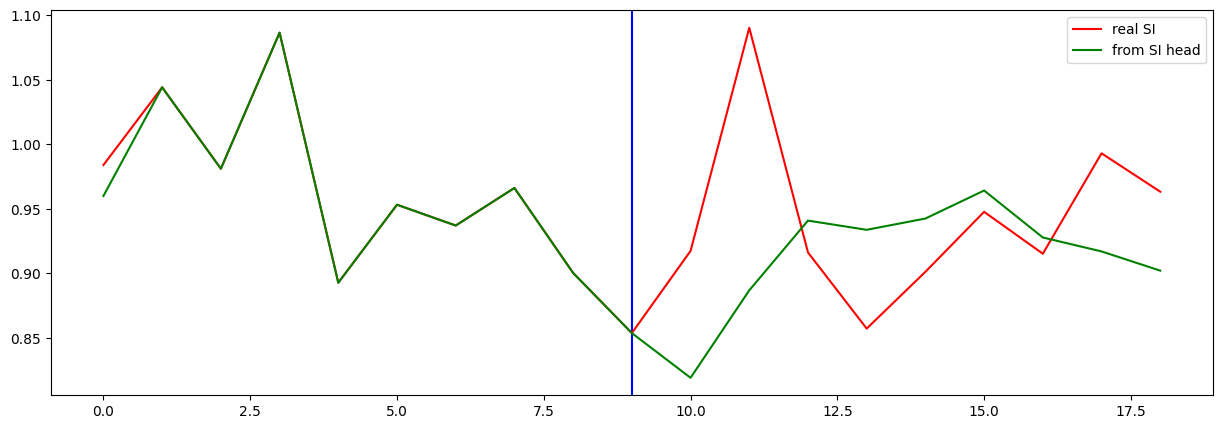

Testing R**2 - (all) - (no inputs):  0.9713348131961635
Testing R**2 - (f2) - SI full (no inputs):  -6.8038004725567465
Testing R**2 - SI head only (no inputs):  -1.7088915116142918
0 ...index R**2 (no inputs):  -1.4515745041096775
1 ...index R**2 (no inputs):  -2.035873040276048
2 ...index R**2 (no inputs):  -6.8038004725567465
3 ...index R**2 (no inputs):  -552.9834190233785
4 ...index R**2 (no inputs):  -32.84398028763273
5 ...index R**2 (no inputs):  -24.98497159148221
6 ...index R**2 (no inputs):  0.3668807231017477
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19010212074463784
10 ...index R**2 (no inputs):  -0.35386403085601725
11 ...index R**2 (no inputs):  -33.89976691201347
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2826323582686463
16 ...index R**2 (no inputs):  -0.41955399371390545
17 ...index R**2 (no inputs):  -133.49555615

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.914895
Loss_SI: 0.833324134349823 Loss_all: 1.6490377187728882
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.453708
Loss_SI: 0.4157866835594177 Loss_all: 0.7950043678283691
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.310812
Loss_SI: 0.2447112798690796 Loss_all: 0.9057191014289856
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.149005
Loss_SI: 0.09019619971513748 Loss_all: 0.6782866716384888
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.158527
Loss_SI: 0.07113860547542572 Loss_all: 0.945025622844696
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.148992
Loss_SI: 0.09742425382137299 Loss_all: 0.613104522228241
Prediction shape: torch.Size([32, 35])
===


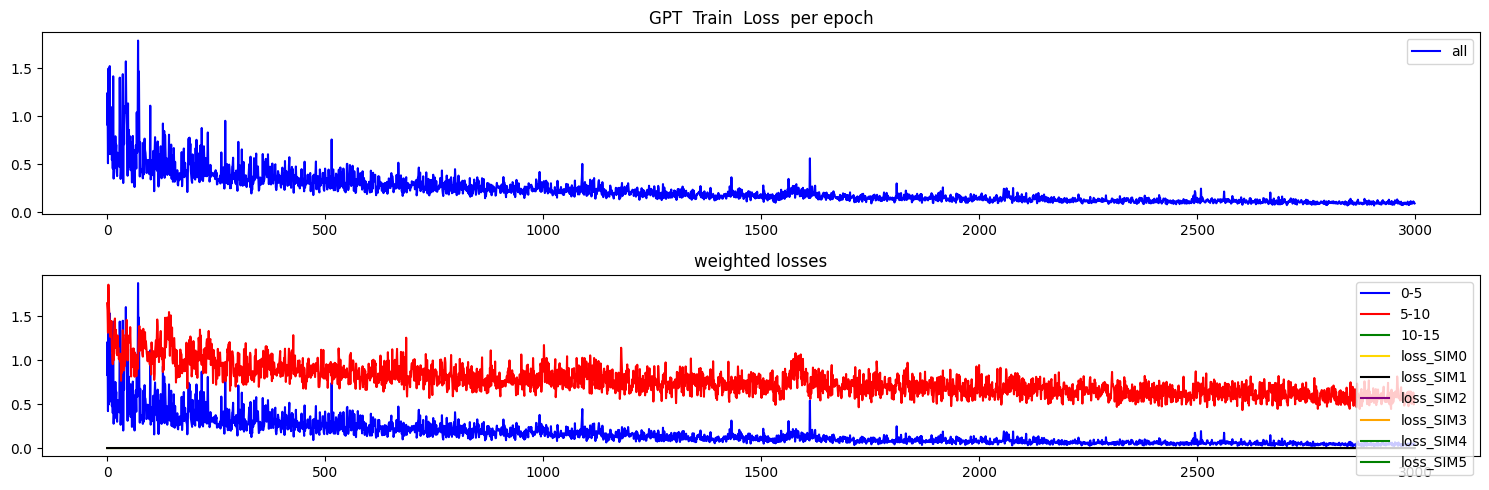

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


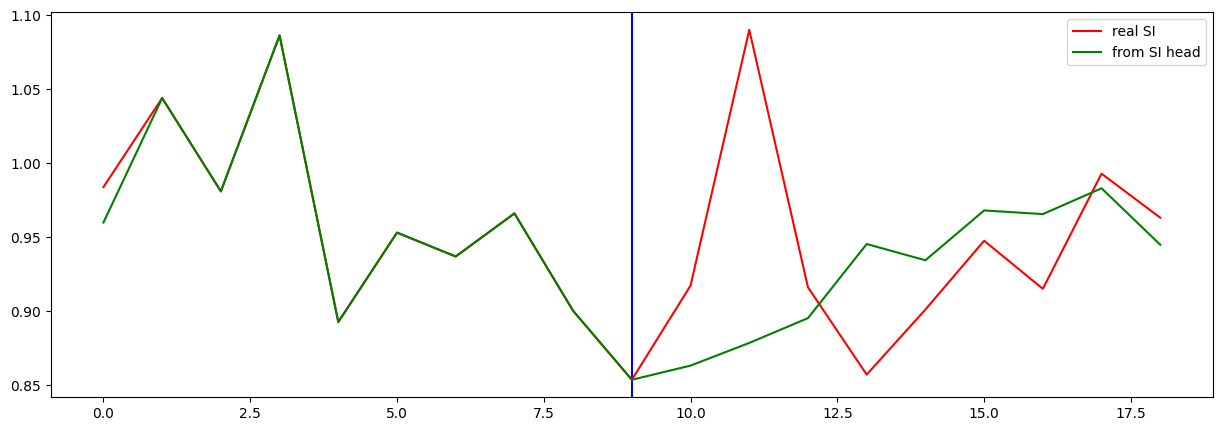

Testing R**2 - (all) - (no inputs):  0.9764238511030618
Testing R**2 - (f2) - SI full (no inputs):  -1.4313779394636321
Testing R**2 - SI head only (no inputs):  -0.7137757599650834
0 ...index R**2 (no inputs):  -0.41926816891604024
1 ...index R**2 (no inputs):  0.04571130226330411
2 ...index R**2 (no inputs):  -1.4313779394636321
3 ...index R**2 (no inputs):  -3416.1796018236705
4 ...index R**2 (no inputs):  -129.54235409906613
5 ...index R**2 (no inputs):  -20.174242944465796
6 ...index R**2 (no inputs):  -0.025964079178145916
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05856333917490231
10 ...index R**2 (no inputs):  -1.9375105817170257
11 ...index R**2 (no inputs):  -42.46393298248654
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.792075409277608
16 ...index R**2 (no inputs):  -0.5783138936056487
17 ...index R**2 (no inputs):  -11.7805

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.938067
Loss_SI: 0.8940911293029785 Loss_all: 1.3338477611541748
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.117295
Loss_SI: 0.04552619904279709 Loss_all: 0.7632160186767578
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.086465
Loss_SI: 0.031538087874650955 Loss_all: 0.5808049440383911
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.056238
Loss_SI: 0.016026675701141357 Loss_all: 0.41813865303993225
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.049941
Loss_SI: 0.011355392634868622 Loss_all: 0.39720651507377625
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.042374
Loss_SI: 0.008976837620139122 Loss_all: 0.3429473042488098
Prediction shape: torch.Size([32, 35])
===


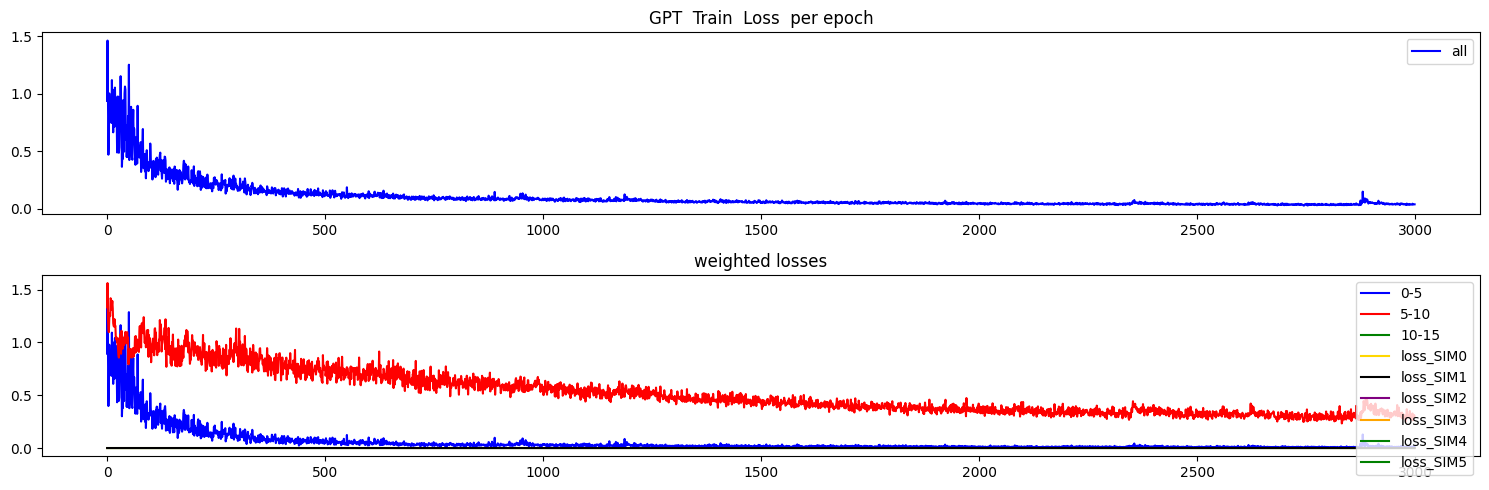

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


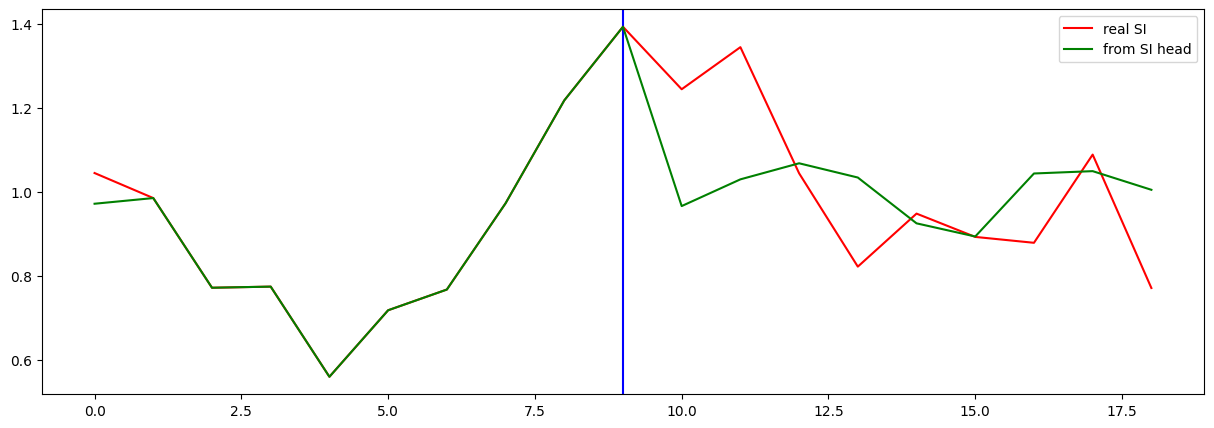

Testing R**2 - (all) - (no inputs):  0.9770744484274005
Testing R**2 - (f2) - SI full (no inputs):  -0.2217618020395502
Testing R**2 - SI head only (no inputs):  -0.22076375463343023
0 ...index R**2 (no inputs):  -0.8636043155272293
1 ...index R**2 (no inputs):  -0.03147352686209448
2 ...index R**2 (no inputs):  -0.2217618020395502
3 ...index R**2 (no inputs):  -23.258415834395613
4 ...index R**2 (no inputs):  -1.4387685816072855
5 ...index R**2 (no inputs):  -133.9831077073982
6 ...index R**2 (no inputs):  -71.71546491164356
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.02684936126812032
10 ...index R**2 (no inputs):  -0.6305951859480894
11 ...index R**2 (no inputs):  -110.65868767556073
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6479616566627429
16 ...index R**2 (no inputs):  -0.02915691489317873
17 ...index R**2 (no inputs):  -438.1647

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.636321
Loss_SI: 0.570618212223053 Loss_all: 1.2276484966278076
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.165632
Loss_SI: 0.10449637472629547 Loss_all: 0.7158491611480713
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.135893
Loss_SI: 0.07961474359035492 Loss_all: 0.642398476600647
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.087272
Loss_SI: 0.03572320193052292 Loss_all: 0.5512082576751709
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.077876
Loss_SI: 0.029878590255975723 Loss_all: 0.5098479390144348
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.074210
Loss_SI: 0.025647848844528198 Loss_all: 0.5112709999084473
Prediction shape: torch.Size([32, 35])
===


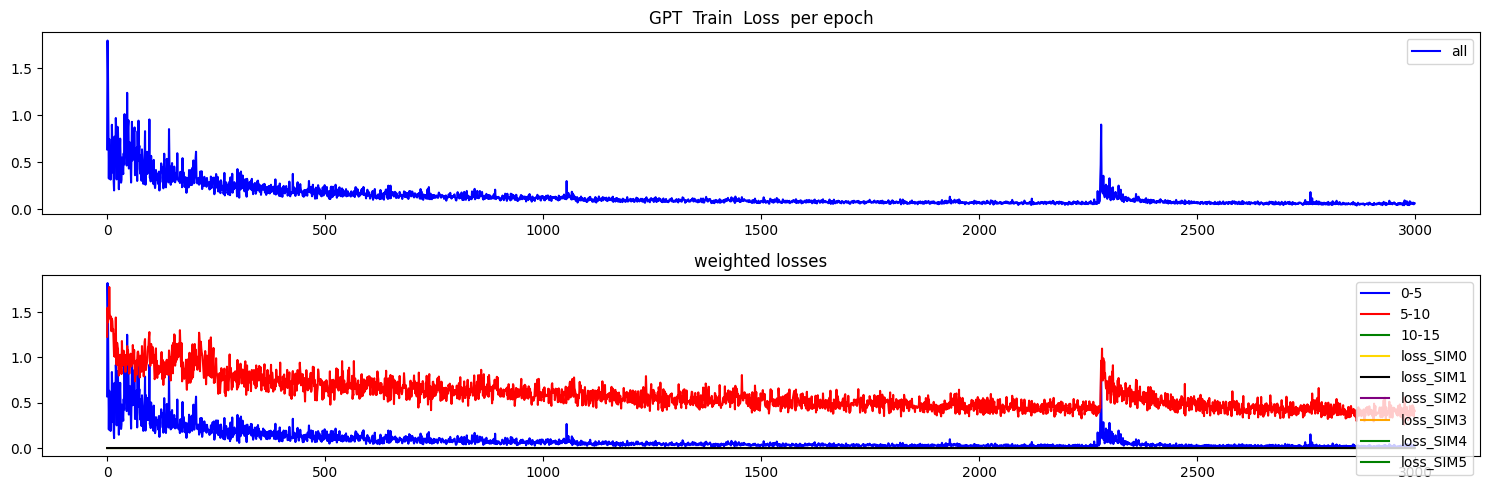

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


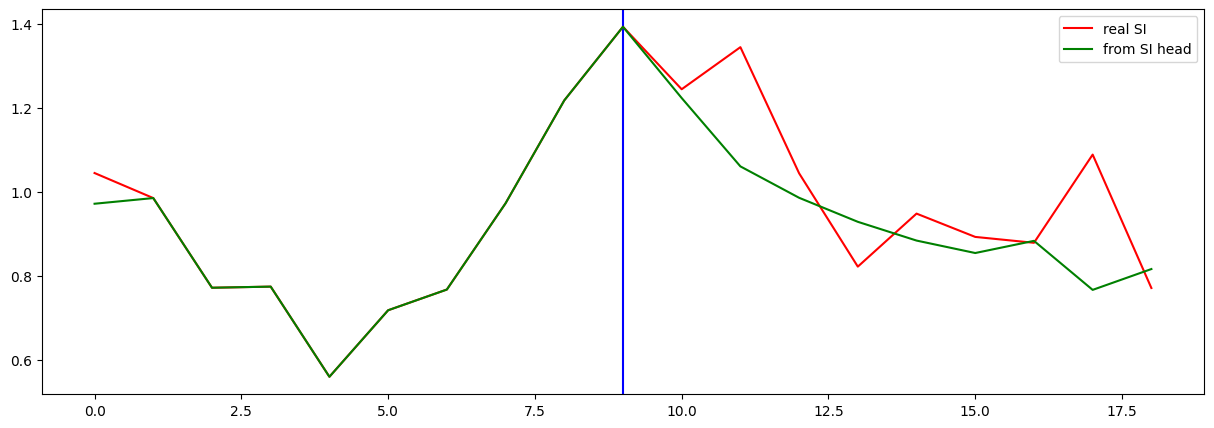

Testing R**2 - (all) - (no inputs):  0.986019167602897
Testing R**2 - (f2) - SI full (no inputs):  0.15594062295374422
Testing R**2 - SI head only (no inputs):  0.42908214070873785
0 ...index R**2 (no inputs):  -0.5553574350679968
1 ...index R**2 (no inputs):  0.3687368811101035
2 ...index R**2 (no inputs):  0.15594062295374422
3 ...index R**2 (no inputs):  -3651.5725638685176
4 ...index R**2 (no inputs):  -35.13166707946213
5 ...index R**2 (no inputs):  -81.2098182892274
6 ...index R**2 (no inputs):  -23.426276161290684
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.27577072030938177
10 ...index R**2 (no inputs):  -0.06874300275375389
11 ...index R**2 (no inputs):  -3.7468715930411793
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.724912078310409
16 ...index R**2 (no inputs):  0.19023469379021218
17 ...index R**2 (no inputs):  -165.030337539

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.178457
Loss_SI: 1.1722111701965332 Loss_all: 1.2346693277359009
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.363896
Loss_SI: 0.30802372097969055 Loss_all: 0.8667507171630859
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.224112
Loss_SI: 0.16435080766677856 Loss_all: 0.7619665265083313
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.200415
Loss_SI: 0.1531878113746643 Loss_all: 0.6254574656486511
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.116094
Loss_SI: 0.0601787194609642 Loss_all: 0.6193288564682007
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.080825
Loss_SI: 0.03252574801445007 Loss_all: 0.5155161619186401
Prediction shape: torch.Size([32, 35])
===


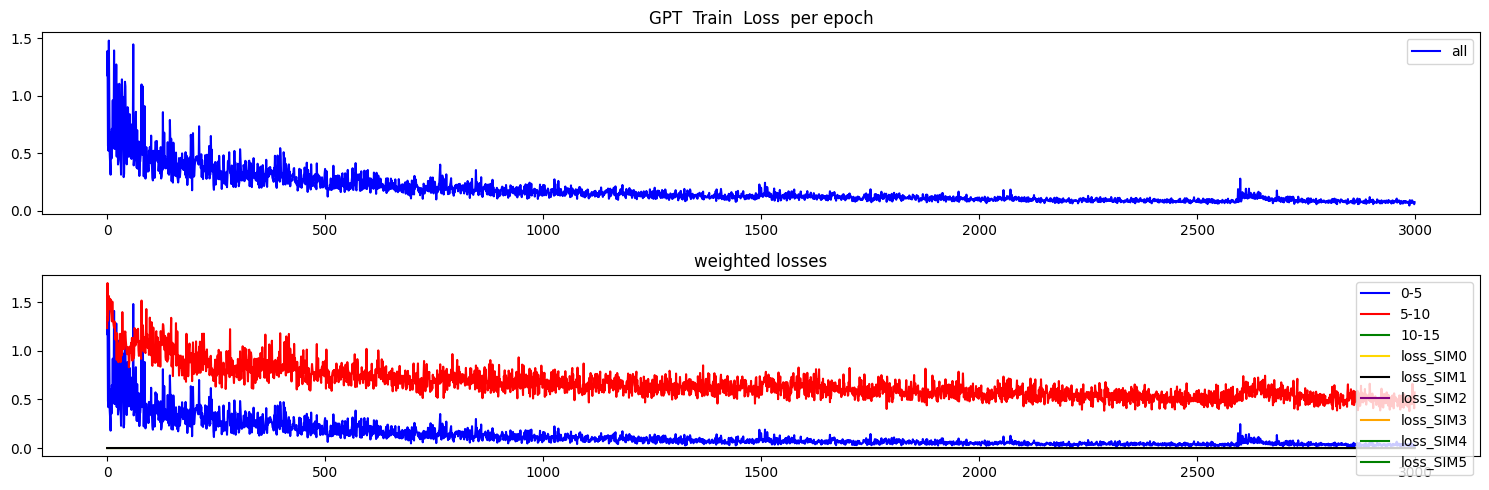

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


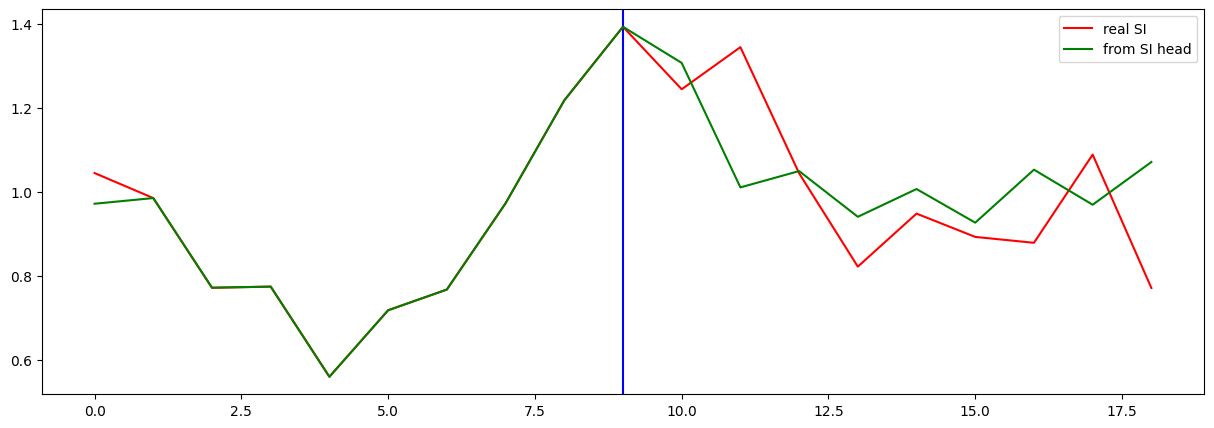

Testing R**2 - (all) - (no inputs):  0.9937665427246613
Testing R**2 - (f2) - SI full (no inputs):  0.27152019858494625
Testing R**2 - SI head only (no inputs):  0.5386459759448867
0 ...index R**2 (no inputs):  -0.01817463177305223
1 ...index R**2 (no inputs):  0.01739115682818393
2 ...index R**2 (no inputs):  0.27152019858494625
3 ...index R**2 (no inputs):  -2861.5691168885305
4 ...index R**2 (no inputs):  -11.208926165252516
5 ...index R**2 (no inputs):  -34.912693744047786
6 ...index R**2 (no inputs):  -10.12129856632117
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.024953464914746037
10 ...index R**2 (no inputs):  0.03702031145191531
11 ...index R**2 (no inputs):  -101.65305650418998
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.16830302862980118
16 ...index R**2 (no inputs):  -0.10554613786247491
17 ...index R**2 (no inputs):  -668.930

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.588600
Loss_SI: 0.5038024187088013 Loss_all: 1.3517807722091675
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.304090
Loss_SI: 0.2410251796245575 Loss_all: 0.8716697096824646
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.268945
Loss_SI: 0.22758056223392487 Loss_all: 0.6412227153778076
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.121921
Loss_SI: 0.061408646404743195 Loss_all: 0.6665303111076355
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.103661
Loss_SI: 0.05567318573594093 Loss_all: 0.5355527997016907
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.129556
Loss_SI: 0.07397492229938507 Loss_all: 0.6297903060913086
Prediction shape: torch.Size([32, 35])
===


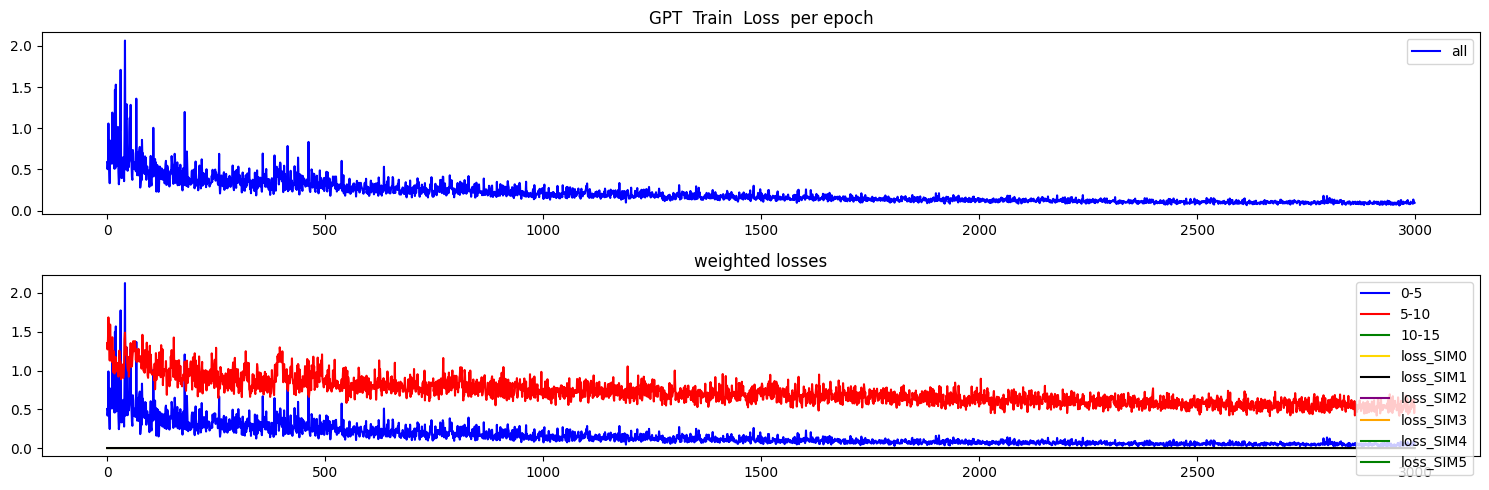

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


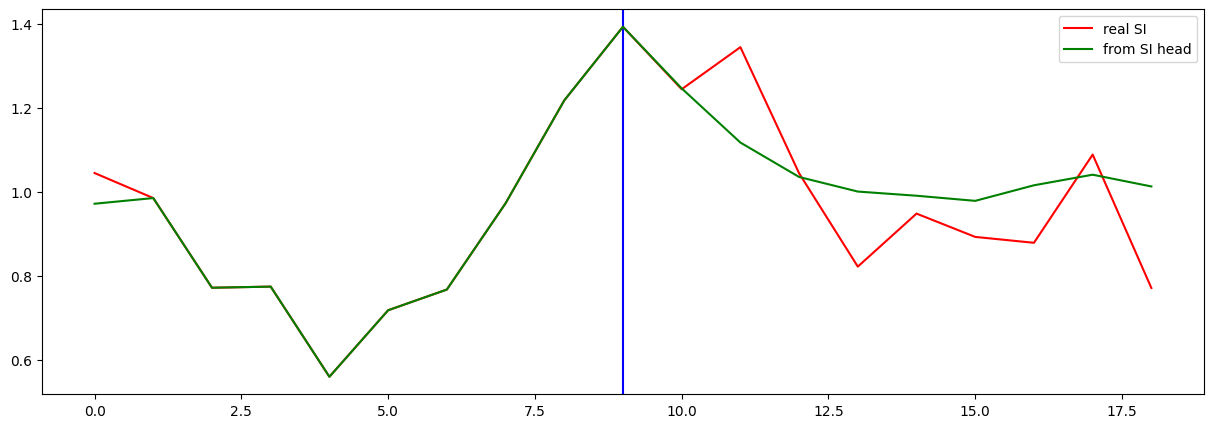

Testing R**2 - (all) - (no inputs):  0.9898469884425848
Testing R**2 - (f2) - SI full (no inputs):  0.22414844720988558
Testing R**2 - SI head only (no inputs):  0.3262421576891339
0 ...index R**2 (no inputs):  -0.006244241281144536
1 ...index R**2 (no inputs):  -0.1061221565413979
2 ...index R**2 (no inputs):  0.22414844720988558
3 ...index R**2 (no inputs):  -3295.223081802754
4 ...index R**2 (no inputs):  -1.5245769656518067
5 ...index R**2 (no inputs):  -58.150711054529346
6 ...index R**2 (no inputs):  -23.64705039236088
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2855109190240188
10 ...index R**2 (no inputs):  -0.08925042898003799
11 ...index R**2 (no inputs):  -96.7996473014551
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6605334384828652
16 ...index R**2 (no inputs):  -0.9191011263407638
17 ...index R**2 (no inputs):  -708.2921856

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.5101729140198308


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.48459336939153697


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.7986691389218714


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.4416713488944679



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -1.7556613666248668
2 .....R² on first n steps: -2.08957165400794
3 .....R² on first n steps: -0.8072438040207521
4 .....R² on first n steps: -0.7461881827759511
5 .....R² on first n steps: -0.6833394490092348
6 .....R² on first n steps: -0.5398526261785146
7 .....R² on first n steps: -0.5754425818502424
8 .....R² on first n steps: -0.6202667844645089
9 .....R² on first n steps: -0.5101729140198308


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -0.09639513870501171
2 .....R² on first n steps: -1.3888274898503603
3 .....R² on first n steps: -0.39366934511250573
4 .....R² on first n steps: -0.27922174703630964
5 .....R² on first n steps: -0.3588147157547126
6 .....R² on first n steps: -0.29642990884114573
7 .....R² on first n steps: -0.4691589887934584
8 .....R² on first n steps: -0.4641528748393853
9 .....R² on first n steps: -0.48459336939153697


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -0.5593487621163902
2 .....R² on first n steps: -1.4437362840708978
3 .....R² on first n steps: -0.6128734321414662
4 .....R² on first n steps: -0.4662690334311286
5 .....R² on first n steps: -0.5779975650861602
6 .....R² on first n steps: -0.5646787906446908
7 .....R² on first n steps: -0.6956321488483519
8 .....R² on first n steps: -0.8578420245022162
9 .....R² on first n steps: -0.7986691389218714


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.19938263182484772
2 .....R² on first n steps: -0.48069379332310125
3 .....R² on first n steps: 0.0467226443992792
4 .....R² on first n steps: -0.2717817791417323
5 .....R² on first n steps: -0.42856547621758345
6 .....R² on first n steps: -0.4351649646186577
7 .....R² on first n steps: -0.6088049263924458
8 .....R² on first n steps: -0.5389538370386555
9 .....R² on first n steps: -0.4416713488944679



## Plot


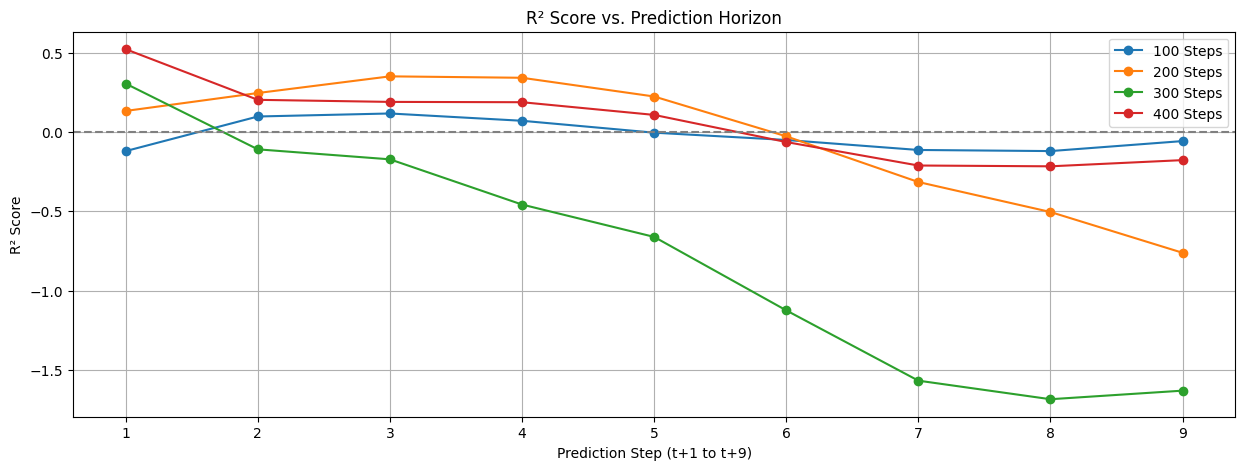

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
